# Install Libraries and Import Dataset

In [1]:
#install pandas library for data manipulation and install openpyxl to open Excel file
!pip install pandas
!pip install numpy
!pip install openpyxl

#import pandas library 
import pandas as pd
import numpy as np

#import UN dataset 
Table1 = pd.read_excel('/home/jovyan/1340/UN_MigrantStockTotal_2015.xlsx','Table 1')
Table2 = pd.read_excel('/home/jovyan/1340/UN_MigrantStockTotal_2015.xlsx','Table 2')
Table3 = pd.read_excel('/home/jovyan/1340/UN_MigrantStockTotal_2015.xlsx','Table 3')
Table4 = pd.read_excel('/home/jovyan/1340/UN_MigrantStockTotal_2015.xlsx','Table 4')
Table5 = pd.read_excel('/home/jovyan/1340/UN_MigrantStockTotal_2015.xlsx','Table 5')
Table6 = pd.read_excel('/home/jovyan/1340/UN_MigrantStockTotal_2015.xlsx','Table 6')
Annex = pd.read_excel('/home/jovyan/1340/UN_MigrantStockTotal_2015.xlsx','ANNEX')
CONTENTS = pd.read_excel('/home/jovyan/1340/UN_MigrantStockTotal_2015.xlsx','CONTENTS')
NOTES = pd.read_excel('/home/jovyan/1340/UN_MigrantStockTotal_2015.xlsx','NOTES')

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


# Table1

In [2]:
print(Table1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   266 non-null    object 
 1   Unnamed: 1   266 non-null    object 
 2   Unnamed: 2   27 non-null     object 
 3   Unnamed: 3   266 non-null    object 
 4   Unnamed: 4   241 non-null    object 
 5   Unnamed: 5   267 non-null    object 
 6   Unnamed: 6   266 non-null    object 
 7   Unnamed: 7   266 non-null    object 
 8   Unnamed: 8   266 non-null    object 
 9   Unnamed: 9   266 non-null    float64
 10  Unnamed: 10  266 non-null    float64
 11  Unnamed: 11  267 non-null    object 
 12  Unnamed: 12  266 non-null    object 
 13  Unnamed: 13  266 non-null    object 
 14  Unnamed: 14  266 non-null    object 
 15  Unnamed: 15  266 non-null    float64
 16  Unnamed: 16  266 non-null    float64
 17  Unnamed: 17  267 non-null    object 
 18  Unnamed: 18  266 non-null    object 
 19  Unnamed:

In [3]:
#Understand the table and features
Table1.shape

(280, 23)

In [4]:
#remove rows index range 0 to 12; this is where the UN header was. 
Table1 = Table1.drop(Table1.index[range(13)])

#reset index
Table1 = Table1.reset_index(drop=True)

#Remove current column titles (unnamed) and make row 13 column titles instead
Table1_df = Table1[2:] 

#Get a list of columns
Table1_df.columns


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22'],
      dtype='object')

In [5]:
#Transpose the table for gender and year columns
Table1_df.columns = ['Sort\norder','Major area, region, country or area of destination','Notes','Country code','Type of data (a)','Both_Sexes 1990','Both_Sexes 1995','Both_Sexes 2000','Both_Sexes 2005','Both_Sexes 2010','Both_Sexes 2015',
             'Male 1990', 'Male 1995', 'Male 2000', 'Male 2005','Male 2010', 'Male 2015','Female 1990','Female 1995','Female 2000','Female 2005','Female 2010','Female 2015']

Table1_df = pd.melt(Table1_df, id_vars = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)'], var_name = ['Sex_Year'], value_name='International Migrant Stock at mid-year')

Table1_df[['Gender', 'Year']] = Table1_df['Sex_Year'].str.split(' ', n = 1, expand = True)

#drop duplicate column Sex_Year
Table1_df = Table1_df.drop(['Sex_Year'], axis = 1)

In [6]:
#reorder columns
Table1_newdf = Table1_df[['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)', 'Year','Gender', 'International Migrant Stock at mid-year']]
Table1_newdf

#value formatting
Table1_newdf = Table1_newdf.replace('\..+', np.nan, regex=True)
Table1_newdf['International Migrant Stock at mid-year'] = Table1_newdf['International Migrant Stock at mid-year'].astype(float)

In [7]:
Table1_FINAL = Table1_newdf
Table1_FINAL

Sort\norder Major area, region, country or area of destination Notes  \
0              1                                              WORLD   NaN   
1              2                                  Developed regions   (b)   
2              3                                 Developing regions   (c)   
3              4                          Least developed countries   (d)   
4              5  Less developed regions excluding least develop...   NaN   
...          ...                                                ...   ...   
4765         261                                              Samoa   NaN   
4766         262                                            Tokelau   NaN   
4767         263                                              Tonga   NaN   
4768         264                                             Tuvalu   NaN   
4769         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data (a)  Year      Gender  \
0             900              NaN  1990  Both_Sexes   
1             901              NaN  1990  Both_Sexes   
2             902              NaN  1990  Both_Sexes   
3             941              NaN  1990  Both_Sexes   
4             934              NaN  1990  Both_Sexes   
...           ...              ...   ...         ...   
4765          882                B  2015      Female   
4766          772                B  2015      Female   
4767          776                B  2015      Female   
4768          798                C  2015      Female   
4769          876                B  2015      Female   

      International Migrant Stock at mid-year  
0                                 152563212.0  
1                                  82378628.0  
2                                  70184584.0  
3                                  11075966.0  
4                                  59105261.0  
...                                       ...  
4765                                   2460.0  
4766                                    254.0  
4767                                   2604.0  
4768                                     63.0  
4769                                   1411.0  

[4770 rows x 8 columns]

In [8]:
#Used later
Table1_annex = Table1_df

# Annex Table

In [9]:
Annex.head(20)

Unnamed: 0       Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0            NaN              NaN         NaN         NaN   
1            NaN              NaN         NaN         NaN   
2            NaN              NaN         NaN         NaN   
3            NaN              NaN         NaN         NaN   
4            NaN              NaN         NaN         NaN   
5            NaN              NaN         NaN         NaN   
6            NaN              NaN         NaN         NaN   
7            NaN              NaN         NaN         NaN   
8            NaN              NaN         NaN         NaN   
9            NaN              NaN         NaN         NaN   
10           NaN              NaN         NaN         NaN   
11           NaN              NaN         NaN         NaN   
12           NaN              NaN         NaN         NaN   
13  Country code  Country or area  Sort order  Major area   
14             4      Afghanistan          99        Asia   
15             8          Albania         154      Europe   
16            12          Algeria          40      Africa   
17            16   American Samoa         257     Oceania   
18            20          Andorra         155      Europe   
19            24           Angola          30      Africa   

                                           Unnamed: 4  Unnamed: 5  \
0                                                 NaN         NaN   
1                                                 NaN         NaN   
2                                                 NaN         NaN   
3                                      United Nations         NaN   
4                                 Population Division         NaN   
5           Department of Economic and Social Affairs         NaN   
6                                                 NaN         NaN   
7   Trends in International Migrant Stock: The 201...         NaN   
8   ANNEX. Classification of countries and areas b...         NaN   
9                           POP/DB/MIG/Stock/Rev.2015         NaN   
10  December 2015 - Copyright © 2015 by United Nat...         NaN   
11  Suggested citation: United Nations, Department...         NaN   
12                                                NaN         NaN   
13                                               Code  Sort order   
14                                                935          71   
15                                                908         127   
16                                                903           7   
17                                                909         238   
18                                                908         127   
19                                                903           7   

         Unnamed: 6 Unnamed: 7  Unnamed: 8        Unnamed: 9  \
0               NaN        NaN         NaN               NaN   
1               NaN        NaN         NaN               NaN   
2               NaN        NaN         NaN               NaN   
3               NaN        NaN         NaN               NaN   
4               NaN        NaN         NaN               NaN   
5               NaN        NaN         NaN               NaN   
6               NaN        NaN         NaN               NaN   
7               NaN        NaN         NaN               NaN   
8               NaN        NaN         NaN               NaN   
9               NaN        NaN         NaN               NaN   
10              NaN        NaN         NaN               NaN   
11              NaN        NaN         NaN               NaN   
12              NaN        NaN         NaN               NaN   
13           Region       Code  Sort order  Developed region   
14    Southern Asia       5501          98                No   
15  Southern Europe        925         153               Yes   
16  Northern Africa        912          39                No   
17        Polynesia        957         256                No   
18  Southern Europe        925         153               Y

In [10]:
#remove rows index range 0 to 12; this is where the UN header was. 
Annex_df = Annex.drop(Table1.index[range(13)])

Annex_df = Annex_df.reset_index(drop=True) #Reset index
Annex_df.columns = Annex_df.iloc[0] #Make index 0 column headers
Annex_df = Annex_df[1:] #keep index 1 onwards in table from Annex_df
Annex_df = Annex_df.reset_index(drop=True) #reset index again

#needed to update sort columns to make it specific to country, major and region
Annex_df.columns = ['Country code', 'Country or area', 'Country sort order','Major area', 'Major code', 'Major sort order', 'Region', 'Region code', 'Region sort order', 'Developed region', 'Least developed country', 'Sub-Saharan Africa']

#codes data frame for Annex sheet
Annex_df_codes = Annex_df[['Region code','Major code','Country code']]

#Country, major, Africa and region data frames for Annex sheet
Annex_df_country = pd.merge(Annex_df[['Country code','Country or area', 'Least developed country','Country sort order']], Table1_annex[['Country code','Notes', 'Type of data (a)']])

Annex_df_Africa = Annex_df[['Country code','Sub-Saharan Africa']]

Annex_df_major = Annex_df[['Major code','Major area', 'Major sort order']]
Annex_df_major = Annex_df_major.drop_duplicates()
Annex_df_major = Annex_df_major.reset_index(drop=True)


Annex_df_region = Annex_df[['Region code','Region','Developed region','Region sort order']]
Annex_df_region = Annex_df_region.drop_duplicates()
Annex_df_region = Annex_df_region.reset_index(drop=True)

# FINAL Annex Tables

In [11]:
Annex_df_country

Country code Country or area Least developed country Country sort order  \
0               4     Afghanistan                     Yes                 99   
1               4     Afghanistan                     Yes                 99   
2               4     Afghanistan                     Yes                 99   
3               4     Afghanistan                     Yes                 99   
4               4     Afghanistan                     Yes                 99   
...           ...             ...                     ...                ...   
4171          716        Zimbabwe                      No                 28   
4172          716        Zimbabwe                      No                 28   
4173          716        Zimbabwe                      No                 28   
4174          716        Zimbabwe                      No                 28   
4175          716        Zimbabwe                      No                 28   

     Notes Type of data (a)  
0      NaN                B  
1      NaN                B  
2      NaN                B  
3      NaN                B  
4      NaN                B  
...    ...              ...  
4171   NaN              B R  
4172   NaN              B R  
4173   NaN              B R  
4174   NaN              B R  
4175   NaN              B R  

[4176 rows x 6 columns]

In [12]:
Annex_df_Africa

Country code Sub-Saharan Africa
0              4                 No
1              8                 No
2             12                 No
3             16                 No
4             20                 No
..           ...                ...
227          876                 No
228          732                 No
229          887                 No
230          894                Yes
231          716                Yes

[232 rows x 2 columns]

In [13]:
Annex_df_major

Major code                       Major area Major sort order
0        935                             Asia               71
1        908                           Europe              127
2        903                           Africa                7
3        909                          Oceania              238
4        904  Latin America and the Caribbean              180
5        905                 Northern America              232

In [14]:
Annex_df_region

Region code                     Region Developed region Region sort order
0         5501              Southern Asia               No                98
1          925            Southern Europe              Yes               153
2          912            Northern Africa               No                39
3          957                  Polynesia               No               256
4          911              Middle Africa               No                29
5          915                  Caribbean               No               181
6          931              South America               No               217
7          922               Western Asia               No               108
8          927  Australia and New Zealand              Yes               239
9          926             Western Europe              Yes               170
10         923             Eastern Europe              Yes               128
11         916            Central America               No               208
12         914             Western Africa               No                53
13         905           Northern America              Yes               232
14         913            Southern Africa               No                47
15         920         South-Eastern Asia               No                86
16         910             Eastern Africa               No                 8
17         924            Northern Europe              Yes               139
18         906               Eastern Asia               No                78
19         928                  Melanesia               No               242
20         954                 Micronesia               No               248
21         906               Eastern Asia              Yes                78
22        5500               Central Asia               No                72

# Table2

In [15]:
#now to work on table 2
Table2.head(20)

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0           NaN                                                NaN        NaN   
1           NaN                                                NaN        NaN   
2           NaN                                                NaN        NaN   
3           NaN                                                NaN        NaN   
4           NaN                                                NaN        NaN   
5           NaN                                                NaN        NaN   
6           NaN                                                NaN        NaN   
7           NaN                                                NaN        NaN   
8           NaN                                                NaN        NaN   
9           NaN                                                NaN        NaN   
10          NaN                                                NaN        NaN   
11          NaN                                                NaN        NaN   
12          NaN                                                NaN        NaN   
13  Sort\norder  Major area, region, country or area of destina...      Notes   
14          NaN                                                NaN        NaN   
15            1                                              WORLD        NaN   
16            2                                  Developed regions        (b)   
17            3                                 Developing regions        (c)   
18            4                          Least developed countries        (d)   
19            5  Less developed regions excluding least develop...        NaN   

      Unnamed: 3                                         Unnamed: 4  \
0            NaN                                                NaN   
1            NaN                                                NaN   
2            NaN                                                NaN   
3            NaN                                     United Nations   
4            NaN                                Population Division   
5            NaN          Department of Economic and Social Affairs   
6            NaN                                                NaN   
7            NaN  Trends in International Migrant Stock: The 201...   
8            NaN  Table 2 -  Total population at mid-year by sex...   
9            NaN                          POP/DB/MIG/Stock/Rev.2015   
10           NaN  December 2015 - Copyright © 2015 by United Nat...   
11           NaN  Suggested citation: United Nations, Department...   
12           NaN                                                NaN   
13  Country code  Total population of both sexes at mid-year (th...   
14           NaN                                               1990   
15           900                                        5309667.699   
16           901                                        1144463.062   
17           902                                        4165204.637   
18           941                                         510057.629   
19           934                                        3655147.008   

     Unnamed: 5   Unnamed: 6   Unnamed: 7   Unnamed: 8   Unnamed: 9  ...  \
0           NaN          NaN          NaN          NaN          NaN  ...   
1           NaN          NaN          NaN          NaN          NaN  ...   
2           NaN          NaN          NaN          NaN          NaN  ...   
3           NaN          NaN          NaN          NaN          NaN  ...   
4           NaN          NaN          NaN          NaN          NaN  ...   
5           NaN          NaN          NaN          NaN          NaN  ...   
6           NaN          NaN          NaN          NaN          NaN  ...   
7           NaN          NaN          NaN          NaN          NaN  ...   
8           NaN          NaN          NaN          NaN          NaN  ...   
9           NaN          NaN          NaN          

In [16]:
Table2.shape


(280, 22)

In [17]:
#remove first 12 rows where UN header was
Table2 = Table2.drop(Table2.index[range(13)])

In [18]:
#reset index
Table2 = Table2.reset_index(drop=True)

In [19]:
Table2

Unnamed: 0                                         Unnamed: 1  \
0    Sort\norder  Major area, region, country or area of destina...   
1            NaN                                                NaN   
2              1                                              WORLD   
3              2                                  Developed regions   
4              3                                 Developing regions   
..           ...                                                ...   
262          261                                              Samoa   
263          262                                            Tokelau   
264          263                                              Tonga   
265          264                                             Tuvalu   
266          265                          Wallis and Futuna Islands   

    Unnamed: 2    Unnamed: 3  \
0        Notes  Country code   
1          NaN           NaN   
2          NaN           900   
3          (b)           901   
4          (c)           902   
..         ...           ...   
262        NaN           882   
263        NaN           772   
264        NaN           776   
265        NaN           798   
266        NaN           876   

                                            Unnamed: 4   Unnamed: 5  \
0    Total population of both sexes at mid-year (th...          NaN   
1                                                 1990     1995.000   
2                                          5309667.699  5735123.084   
3                                          1144463.062  1169761.211   
4                                          4165204.637  4565361.873   
..                                                 ...          ...   
262                                            162.865      170.158   
263                                              1.609        1.520   
264                                             95.152       95.889   
265                                              9.004        9.227   
266                                              13.88       14.143   

      Unnamed: 6   Unnamed: 7   Unnamed: 8   Unnamed: 9  ...  Unnamed: 12  \
0            NaN          NaN          NaN          NaN  ...          NaN   
1       2000.000     2005.000     2010.000     2015.000  ...         2000   
2    6126622.121  6519635.850  6929725.043  7349472.099  ...  3084537.662   
3    1188811.731  1208919.509  1233375.711  1251351.086  ...   578010.218   
4    4937810.390  5310716.341  5696349.332  6098121.013  ...  2506527.444   
..           ...          ...          ...          ...  ...          ...   
262      174.614      179.928      186.029      193.228  ...       90.932   
263        1.552        1.210        1.135        1.250  ...           ..   
264       97.898      100.858      103.947      106.170  ...       49.788   
265        9.419        9.694        9.827        9.916  ...           ..   
266       14.497       14.246       13.565       13.151  ...           ..   

     Unnamed: 13  Unnamed: 14  Unnamed: 15  \
0            NaN          NaN          NaN   
1           2005         2010         2015   
2    3285082.249  3493956.904  3707205.753   
3     587962.213   599955.476   609297.148   
4    2697120.036  2894001.428  3097908.605   
..           ...          ...          ...   
262       93.185        95.95       99.644   
263           ..           ..           ..   
264       50.574       52.055       53.239   
265           ..           ..           ..   
266           ..           ..           ..   

                                         Unnamed: 16  Unnamed: 17  \
0    Total female population at mid-year (thousands)          NaN   
1                                               1990         1995   
2                                        2639243.998  2848487.191   
3                                         589207.436   601492.755   
4                                        2050036.562  2246994.436   
..                     

In [20]:
#Remove current column titles (unnamed) and make row index 0 column titles instead
Table2_df = Table2[2:] 

In [21]:
#Need to update NaN columns 
Table2_df.columns = ['Sort\norder','Major area, region, country or area of destination','Notes','Country code','Both_Sexes 1990','Both_Sexes 1995','Both_Sexes 2000','Both_Sexes 2005','Both_Sexes 2010','Both_Sexes 2015',
             'Male 1990', 'Male 1995', 'Male 2000', 'Male 2005','Male 2010', 'Male 2015','Female 1990','Female 1995','Female 2000','Female 2005','Female 2010','Female 2015']
                                     

In [22]:
Table2_df

Sort\norder Major area, region, country or area of destination Notes  \
2             1                                              WORLD   NaN   
3             2                                  Developed regions   (b)   
4             3                                 Developing regions   (c)   
5             4                          Least developed countries   (d)   
6             5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
262         261                                              Samoa   NaN   
263         262                                            Tokelau   NaN   
264         263                                              Tonga   NaN   
265         264                                             Tuvalu   NaN   
266         265                          Wallis and Futuna Islands   NaN   

    Country code Both_Sexes 1990  Both_Sexes 1995  Both_Sexes 2000  \
2            900     5309667.699      5735123.084      6126622.121   
3            901     1144463.062      1169761.211      1188811.731   
4            902     4165204.637      4565361.873      4937810.390   
5            941      510057.629       585189.354       664386.087   
6            934     3655147.008      3980172.519      4273424.303   
..           ...             ...              ...              ...   
262          882         162.865          170.158          174.614   
263          772           1.609            1.520            1.552   
264          776          95.152           95.889           97.898   
265          798           9.004            9.227            9.419   
266          876           13.88           14.143           14.497   

     Both_Sexes 2005  Both_Sexes 2010  Both_Sexes 2015  ...    Male 2000  \
2        6519635.850      6929725.043      7349472.099  ...  3084537.662   
3        1208919.509      1233375.711      1251351.086  ...   578010.218   
4        5310716.341      5696349.332      6098121.013  ...  2506527.444   
5         752804.951       847254.847       954157.804  ...   331482.475   
6        4557911.390      4849094.485      5143963.209  ...  2175044.969   
..               ...              ...              ...  ...          ...   
262          179.928          186.029          193.228  ...       90.932   
263            1.210            1.135            1.250  ...           ..   
264          100.858          103.947          106.170  ...       49.788   
265            9.694            9.827            9.916  ...           ..   
266           14.246           13.565           13.151  ...           ..   

       Male 2005    Male 2010    Male 2015  Female 1990  Female 1995  \
2    3285082.249  3493956.904  3707205.753  2639243.998  2848487.191   
3     587962.213   599955.476   609297.148   589207.436   601492.755   
4    2697120.036  2894001.428  3097908.605  2050036.562  2246994.436   
5     375757.715   422397.532   476031.179   256015.073   293162.612   
6    2321362.321  2471603.896  2621877.426  1794021.489  1953831.824   
..           ...          ...          ...          ...          ...   
262       93.185        95.95       99.644       77.856        81.67   
263           ..           ..           ..           ..           ..   
264       50.574       52.055       53.239       46.905       47.275   
265           ..           ..           ..           ..           ..   
266           ..           ..           ..           ..           ..   

     Female 2000  Female 2005  Female 2010  Female 2015  
2    3042084.459  3234553.601  3435768.139  3642266.346  
3     610801.513   620957.296   633420.235   642053.938  
4    2431282.946  2613596.305  2802347.904  3000212.408  
5     332903.612   377047.236   424857.315   478126.625  
6    2098379.334  2236549.069  2377490.589  2522085.783  
..           ...          ...          ...          ...  
262       83.682       86.743       90.079       93.584  
263     

In [23]:
Table2_df 

Sort\norder Major area, region, country or area of destination Notes  \
2             1                                              WORLD   NaN   
3             2                                  Developed regions   (b)   
4             3                                 Developing regions   (c)   
5             4                          Least developed countries   (d)   
6             5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
262         261                                              Samoa   NaN   
263         262                                            Tokelau   NaN   
264         263                                              Tonga   NaN   
265         264                                             Tuvalu   NaN   
266         265                          Wallis and Futuna Islands   NaN   

    Country code Both_Sexes 1990  Both_Sexes 1995  Both_Sexes 2000  \
2            900     5309667.699      5735123.084      6126622.121   
3            901     1144463.062      1169761.211      1188811.731   
4            902     4165204.637      4565361.873      4937810.390   
5            941      510057.629       585189.354       664386.087   
6            934     3655147.008      3980172.519      4273424.303   
..           ...             ...              ...              ...   
262          882         162.865          170.158          174.614   
263          772           1.609            1.520            1.552   
264          776          95.152           95.889           97.898   
265          798           9.004            9.227            9.419   
266          876           13.88           14.143           14.497   

     Both_Sexes 2005  Both_Sexes 2010  Both_Sexes 2015  ...    Male 2000  \
2        6519635.850      6929725.043      7349472.099  ...  3084537.662   
3        1208919.509      1233375.711      1251351.086  ...   578010.218   
4        5310716.341      5696349.332      6098121.013  ...  2506527.444   
5         752804.951       847254.847       954157.804  ...   331482.475   
6        4557911.390      4849094.485      5143963.209  ...  2175044.969   
..               ...              ...              ...  ...          ...   
262          179.928          186.029          193.228  ...       90.932   
263            1.210            1.135            1.250  ...           ..   
264          100.858          103.947          106.170  ...       49.788   
265            9.694            9.827            9.916  ...           ..   
266           14.246           13.565           13.151  ...           ..   

       Male 2005    Male 2010    Male 2015  Female 1990  Female 1995  \
2    3285082.249  3493956.904  3707205.753  2639243.998  2848487.191   
3     587962.213   599955.476   609297.148   589207.436   601492.755   
4    2697120.036  2894001.428  3097908.605  2050036.562  2246994.436   
5     375757.715   422397.532   476031.179   256015.073   293162.612   
6    2321362.321  2471603.896  2621877.426  1794021.489  1953831.824   
..           ...          ...          ...          ...          ...   
262       93.185        95.95       99.644       77.856        81.67   
263           ..           ..           ..           ..           ..   
264       50.574       52.055       53.239       46.905       47.275   
265           ..           ..           ..           ..           ..   
266           ..           ..           ..           ..           ..   

     Female 2000  Female 2005  Female 2010  Female 2015  
2    3042084.459  3234553.601  3435768.139  3642266.346  
3     610801.513   620957.296   633420.235   642053.938  
4    2431282.946  2613596.305  2802347.904  3000212.408  
5     332903.612   377047.236   424857.315   478126.625  
6    2098379.334  2236549.069  2377490.589  2522085.783  
..           ...          ...          ...          ...  
262       83.682       86.743       90.079       93.584  
263     

In [24]:
Table2_df = pd.melt(Table2_df, id_vars = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code'], var_name = ['Sex_Year'], value_name = 'Total population at mid-year')

In [25]:
Table2_df 

Sort\norder Major area, region, country or area of destination Notes  \
0              1                                              WORLD   NaN   
1              2                                  Developed regions   (b)   
2              3                                 Developing regions   (c)   
3              4                          Least developed countries   (d)   
4              5  Less developed regions excluding least develop...   NaN   
...          ...                                                ...   ...   
4765         261                                              Samoa   NaN   
4766         262                                            Tokelau   NaN   
4767         263                                              Tonga   NaN   
4768         264                                             Tuvalu   NaN   
4769         265                          Wallis and Futuna Islands   NaN   

     Country code         Sex_Year Total population at mid-year  
0             900  Both_Sexes 1990                  5309667.699  
1             901  Both_Sexes 1990                  1144463.062  
2             902  Both_Sexes 1990                  4165204.637  
3             941  Both_Sexes 1990                   510057.629  
4             934  Both_Sexes 1990                  3655147.008  
...           ...              ...                          ...  
4765          882      Female 2015                       93.584  
4766          772      Female 2015                           ..  
4767          776      Female 2015                       52.931  
4768          798      Female 2015                           ..  
4769          876      Female 2015                           ..  

[4770 rows x 6 columns]

In [26]:
Table2_df[['Gender', 'Year']] = Table2_df['Sex_Year'].str.split(' ', n = 1, expand = True)
Table2_df = Table2_df.drop(['Sex_Year'], axis = 1)
Table2_df

Sort\norder Major area, region, country or area of destination Notes  \
0              1                                              WORLD   NaN   
1              2                                  Developed regions   (b)   
2              3                                 Developing regions   (c)   
3              4                          Least developed countries   (d)   
4              5  Less developed regions excluding least develop...   NaN   
...          ...                                                ...   ...   
4765         261                                              Samoa   NaN   
4766         262                                            Tokelau   NaN   
4767         263                                              Tonga   NaN   
4768         264                                             Tuvalu   NaN   
4769         265                          Wallis and Futuna Islands   NaN   

     Country code Total population at mid-year      Gender  Year  
0             900                  5309667.699  Both_Sexes  1990  
1             901                  1144463.062  Both_Sexes  1990  
2             902                  4165204.637  Both_Sexes  1990  
3             941                   510057.629  Both_Sexes  1990  
4             934                  3655147.008  Both_Sexes  1990  
...           ...                          ...         ...   ...  
4765          882                       93.584      Female  2015  
4766          772                           ..      Female  2015  
4767          776                       52.931      Female  2015  
4768          798                           ..      Female  2015  
4769          876                           ..      Female  2015  

[4770 rows x 7 columns]

In [27]:
Table2_newdf = Table2_df[['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Year','Gender', 'Total population at mid-year']]
Table2_newdf

Sort\norder Major area, region, country or area of destination Notes  \
0              1                                              WORLD   NaN   
1              2                                  Developed regions   (b)   
2              3                                 Developing regions   (c)   
3              4                          Least developed countries   (d)   
4              5  Less developed regions excluding least develop...   NaN   
...          ...                                                ...   ...   
4765         261                                              Samoa   NaN   
4766         262                                            Tokelau   NaN   
4767         263                                              Tonga   NaN   
4768         264                                             Tuvalu   NaN   
4769         265                          Wallis and Futuna Islands   NaN   

     Country code  Year      Gender Total population at mid-year  
0             900  1990  Both_Sexes                  5309667.699  
1             901  1990  Both_Sexes                  1144463.062  
2             902  1990  Both_Sexes                  4165204.637  
3             941  1990  Both_Sexes                   510057.629  
4             934  1990  Both_Sexes                  3655147.008  
...           ...   ...         ...                          ...  
4765          882  2015      Female                       93.584  
4766          772  2015      Female                           ..  
4767          776  2015      Female                       52.931  
4768          798  2015      Female                           ..  
4769          876  2015      Female                           ..  

[4770 rows x 7 columns]

In [28]:
Table2_newdf = Table2_newdf.replace('\..+', np.nan, regex=True)
Table2_newdf['Total population at mid-year'] = Table2_newdf['Total population at mid-year'].apply(lambda x: x*1000)

In [29]:
Table2_newdf['Total population at mid-year'] = Table2_newdf['Total population at mid-year'].astype(float)
Table2_newdf

Sort\norder Major area, region, country or area of destination Notes  \
0              1                                              WORLD   NaN   
1              2                                  Developed regions   (b)   
2              3                                 Developing regions   (c)   
3              4                          Least developed countries   (d)   
4              5  Less developed regions excluding least develop...   NaN   
...          ...                                                ...   ...   
4765         261                                              Samoa   NaN   
4766         262                                            Tokelau   NaN   
4767         263                                              Tonga   NaN   
4768         264                                             Tuvalu   NaN   
4769         265                          Wallis and Futuna Islands   NaN   

     Country code  Year      Gender  Total population at mid-year  
0             900  1990  Both_Sexes                  5.309668e+09  
1             901  1990  Both_Sexes                  1.144463e+09  
2             902  1990  Both_Sexes                  4.165205e+09  
3             941  1990  Both_Sexes                  5.100576e+08  
4             934  1990  Both_Sexes                  3.655147e+09  
...           ...   ...         ...                           ...  
4765          882  2015      Female                  9.358400e+04  
4766          772  2015      Female                           NaN  
4767          776  2015      Female                  5.293100e+04  
4768          798  2015      Female                           NaN  
4769          876  2015      Female                           NaN  

[4770 rows x 7 columns]

In [30]:
Table2_FINAL = Table2_newdf

# Table3

In [31]:
#Now on to table 3
Table3.head(15)

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0           NaN                                                NaN        NaN   
1           NaN                                                NaN        NaN   
2           NaN                                                NaN        NaN   
3           NaN                                                NaN        NaN   
4           NaN                                                NaN        NaN   
5           NaN                                                NaN        NaN   
6           NaN                                                NaN        NaN   
7           NaN                                                NaN        NaN   
8           NaN                                                NaN        NaN   
9           NaN                                                NaN        NaN   
10          NaN                                                NaN        NaN   
11          NaN                                                NaN        NaN   
12          NaN                                                NaN        NaN   
13  Sort\norder  Major area, region, country or area of destina...      Notes   
14          NaN                                                NaN        NaN   

      Unnamed: 3                                         Unnamed: 4  \
0            NaN                                                NaN   
1            NaN                                                NaN   
2            NaN                                                NaN   
3            NaN                                     United Nations   
4            NaN                                Population Division   
5            NaN          Department of Economic and Social Affairs   
6            NaN                                                NaN   
7            NaN  Trends in International Migrant Stock: The 201...   
8            NaN  Table 3 - International migrant stock as a per...   
9            NaN                          POP/DB/MIG/Stock/Rev.2015   
10           NaN  December 2015 - Copyright © 2015 by United Nat...   
11           NaN  Suggested citation: United Nations, Department...   
12           NaN                                                NaN   
13  Country code                                   Type of data (a)   
14           NaN                                                NaN   

                                           Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0                                                 NaN        NaN        NaN   
1                                                 NaN        NaN        NaN   
2                                                 NaN        NaN        NaN   
3                                                 NaN        NaN        NaN   
4                                                 NaN        NaN        NaN   
5                                                 NaN        NaN        NaN   
6                                                 NaN        NaN        NaN   
7                                                 NaN        NaN        NaN   
8                                                 NaN        NaN        NaN   
9                                                 NaN        NaN        NaN   
10                                                NaN        NaN        NaN   
11                                                NaN        NaN        NaN   
12                                                NaN        NaN        NaN   
13  International migrant stock as a percentage of...        NaN        NaN   
14                                               1990       1995       2000   

   Unnamed: 8  Unnamed: 9  ...  Unnamed: 13 Unnamed: 14 Unnamed: 15  \
0         NaN         NaN  ...          NaN         NaN         NaN   
1         NaN         NaN  ...          NaN         NaN         NaN   
2         NaN         NaN  ...          NaN         NaN         NaN   
3         NaN         

In [32]:
Table3.shape

(280, 23)

In [33]:
#remove first 12 rows where UN header was
Table3 = Table3.drop(Table3.index[range(13)])

In [34]:
Table3 

Unnamed: 0                                         Unnamed: 1  \
13   Sort\norder  Major area, region, country or area of destina...   
14           NaN                                                NaN   
15             1                                              WORLD   
16             2                                  Developed regions   
17             3                                 Developing regions   
..           ...                                                ...   
275          261                                              Samoa   
276          262                                            Tokelau   
277          263                                              Tonga   
278          264                                             Tuvalu   
279          265                          Wallis and Futuna Islands   

    Unnamed: 2    Unnamed: 3        Unnamed: 4  \
13       Notes  Country code  Type of data (a)   
14         NaN           NaN               NaN   
15         NaN           900               NaN   
16         (b)           901               NaN   
17         (c)           902               NaN   
..         ...           ...               ...   
275        NaN           882                 B   
276        NaN           772                 B   
277        NaN           776                 B   
278        NaN           798                 C   
279        NaN           876                 B   

                                            Unnamed: 5 Unnamed: 6 Unnamed: 7  \
13   International migrant stock as a percentage of...        NaN        NaN   
14                                                1990       1995       2000   
15                                             2.87331   2.803806   2.818899   
16                                            7.198015   7.891085   8.695688   
17                                            1.685021   1.500317   1.404022   
..                                                 ...        ...        ...   
275                                           2.061216   2.758613   3.435005   
276                                          16.780609       17.5  16.881443   
277                                           3.059316   3.414365     3.7631   
278                                           3.531764   2.850331   2.303854   
279                                          10.100865  11.878668  13.899427   

    Unnamed: 8   Unnamed: 9  ...  Unnamed: 13 Unnamed: 14 Unnamed: 15  \
13         NaN          NaN  ...          NaN         NaN         NaN   
14        2005  2010.000000  ...         2000        2005        2010   
15    2.933739     3.199467  ...     2.849206    2.979124    3.280341   
16    9.693045    10.747765  ...     8.743236     9.73154   10.680972   
17    1.395066     1.565106  ...     1.490031    1.507122    1.746117   
..         ...          ...  ...          ...         ...         ...   
275     3.1935     2.753334  ...     3.410241    3.155014    2.703491   
276  21.322314    37.797357  ...           ..          ..          ..   
277   4.264411     4.831308  ...      3.97887    4.603156     5.23869   
278   1.887766     1.567111  ...           ..          ..          ..   
279  16.601151    20.464431  ...           ..          ..          ..   

    Unnamed: 16                                        Unnamed: 17  \
13          NaN  International migrant stock as a percentage of...   
14         2015                                               1990   
15       3.4019                                            2.83474   
16    11.097807                                           7.147777   
17     1.888268                                           1.595116   
..          ...                                                ...   
275    2.477821                                           2.037094   
276          ..                                                 ..   
277    5.873514                                           3.033792   
278          .

In [35]:
Table3 = Table3.reset_index(drop=True)

In [36]:
Table3_df = Table3[2:] 

In [37]:
Table3_df

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
2            1                                              WORLD        NaN   
3            2                                  Developed regions        (b)   
4            3                                 Developing regions        (c)   
5            4                          Least developed countries        (d)   
6            5  Less developed regions excluding least develop...        NaN   
..         ...                                                ...        ...   
262        261                                              Samoa        NaN   
263        262                                            Tokelau        NaN   
264        263                                              Tonga        NaN   
265        264                                             Tuvalu        NaN   
266        265                          Wallis and Futuna Islands        NaN   

    Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
2          900        NaN    2.87331   2.803806   2.818899   2.933739   
3          901        NaN   7.198015   7.891085   8.695688   9.693045   
4          902        NaN   1.685021   1.500317   1.404022   1.395066   
5          941        NaN   2.171513   2.001353   1.516863   1.303078   
6          934        NaN   1.617042   1.426534   1.386338   1.410133   
..         ...        ...        ...        ...        ...        ...   
262        882          B   2.061216   2.758613   3.435005     3.1935   
263        772          B  16.780609       17.5  16.881443  21.322314   
264        776          B   3.059316   3.414365     3.7631   4.264411   
265        798          C   3.531764   2.850331   2.303854   1.887766   
266        876          B  10.100865  11.878668  13.899427  16.601151   

     Unnamed: 9  ...  Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16  \
2      3.199467  ...     2.849206    2.979124    3.280341      3.4019   
3     10.747765  ...     8.743236     9.73154   10.680972   11.097807   
4      1.565106  ...     1.490031    1.507122    1.746117    1.888268   
5      1.182422  ...     1.617552    1.432574    1.293264     1.35773   
6      1.631865  ...     1.470597    1.519189    1.823509    1.984593   
..          ...  ...          ...         ...         ...         ...   
262    2.753334  ...     3.410241    3.155014    2.703491    2.477821   
263   37.797357  ...           ..          ..          ..          ..   
264    4.831308  ...      3.97887    4.603156     5.23869    5.873514   
265    1.567111  ...           ..          ..          ..          ..   
266   20.464431  ...           ..          ..          ..          ..   

    Unnamed: 17 Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22  
2       2.83474    2.775658    2.788169    2.887645    3.117222    3.228342  
3      7.147777     7.84948    8.650694    9.656595   10.811029   11.348476  
4      1.595116    1.417459    1.315351    1.279428    1.378176     1.49061  
5      2.045276    1.901226    1.418405    1.175548    1.073428    1.148865  
6      1.530877    1.344872    1.299002    1.296941    1.432634    1.555397  
..          ...         ...         ...         ...         ...         ...  
262    2.037094    2.746419    3.461915    3.234843    2.806425    2.628654  
263          ..          ..          ..          ..          ..          ..  
264    3.033792     3.29138    3.539805    3.923713    4.422647    4.919612  
265          ..          ..          ..          ..          ..          ..  
266          ..          ..          ..          ..          ..          ..  

[265 rows x 23 columns]

In [38]:
#Need to update NaN columns 
Table3_df.columns = ['Sort\norder','Major area, region, country or area of destination','Notes','Country code','Type of data (a)','Both_Sexes 1990','Both_Sexes 1995','Both_Sexes 2000','Both_Sexes 2005','Both_Sexes 2010','Both_Sexes 2015',
             'Male 1990', 'Male 1995', 'Male 2000', 'Male 2005','Male 2010', 'Male 2015','Female 1990','Female 1995','Female 2000','Female 2005','Female 2010','Female 2015']

In [39]:
Table3_df

Sort\norder Major area, region, country or area of destination Notes  \
2             1                                              WORLD   NaN   
3             2                                  Developed regions   (b)   
4             3                                 Developing regions   (c)   
5             4                          Least developed countries   (d)   
6             5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
262         261                                              Samoa   NaN   
263         262                                            Tokelau   NaN   
264         263                                              Tonga   NaN   
265         264                                             Tuvalu   NaN   
266         265                          Wallis and Futuna Islands   NaN   

    Country code Type of data (a) Both_Sexes 1990 Both_Sexes 1995  \
2            900              NaN         2.87331        2.803806   
3            901              NaN        7.198015        7.891085   
4            902              NaN        1.685021        1.500317   
5            941              NaN        2.171513        2.001353   
6            934              NaN        1.617042        1.426534   
..           ...              ...             ...             ...   
262          882                B        2.061216        2.758613   
263          772                B       16.780609            17.5   
264          776                B        3.059316        3.414365   
265          798                C        3.531764        2.850331   
266          876                B       10.100865       11.878668   

    Both_Sexes 2000 Both_Sexes 2005  Both_Sexes 2010  ...  Male 2000  \
2          2.818899        2.933739         3.199467  ...   2.849206   
3          8.695688        9.693045        10.747765  ...   8.743236   
4          1.404022        1.395066         1.565106  ...   1.490031   
5          1.516863        1.303078         1.182422  ...   1.617552   
6          1.386338        1.410133         1.631865  ...   1.470597   
..              ...             ...              ...  ...        ...   
262        3.435005          3.1935         2.753334  ...   3.410241   
263       16.881443       21.322314        37.797357  ...         ..   
264          3.7631        4.264411         4.831308  ...    3.97887   
265        2.303854        1.887766         1.567111  ...         ..   
266       13.899427       16.601151        20.464431  ...         ..   

    Male 2005  Male 2010  Male 2015 Female 1990 Female 1995 Female 2000  \
2    2.979124   3.280341     3.4019     2.83474    2.775658    2.788169   
3     9.73154  10.680972  11.097807    7.147777     7.84948    8.650694   
4    1.507122   1.746117   1.888268    1.595116    1.417459    1.315351   
5    1.432574   1.293264    1.35773    2.045276    1.901226    1.418405   
6    1.519189   1.823509   1.984593    1.530877    1.344872    1.299002   
..        ...        ...        ...         ...         ...         ...   
262  3.155014   2.703491   2.477821    2.037094    2.746419    3.461915   
263        ..         ..         ..          ..          ..          ..   
264  4.603156    5.23869   5.873514    3.033792     3.29138    3.539805   
265        ..         ..         ..          ..          ..          ..   
266        ..         ..         ..          ..          ..          ..   

    Female 2005 Female 2010 Female 2015  
2      2.887645    3.117222    3.228342  
3      9.656595   10.811029   11.348476  
4      1.279428    1.378176     1.49061  
5      1.175548    1.073428    1.148865  
6      1.296941    1.432634    1.555397  
..          ...         ...         ...  
262    3.234843    2.806425    2.628654  
263          ..          ..          ..  
264    3.923713    4.422647    4.919612  
265          ..          ..          ..  
266          ..          ..       

In [40]:
Table3_df = pd.melt(Table3_df, id_vars = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)'], var_name = ['Sex_Year'], value_name = 'International migrant stock as a percentage of the total population')
Table3_df[['Gender', 'Year']] = Table3_df['Sex_Year'].str.split(' ', n = 1, expand = True)
Table3_df = Table3_df.drop(['Sex_Year'], axis = 1)
Table3_df

Sort\norder Major area, region, country or area of destination Notes  \
0              1                                              WORLD   NaN   
1              2                                  Developed regions   (b)   
2              3                                 Developing regions   (c)   
3              4                          Least developed countries   (d)   
4              5  Less developed regions excluding least develop...   NaN   
...          ...                                                ...   ...   
4765         261                                              Samoa   NaN   
4766         262                                            Tokelau   NaN   
4767         263                                              Tonga   NaN   
4768         264                                             Tuvalu   NaN   
4769         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data (a)  \
0             900              NaN   
1             901              NaN   
2             902              NaN   
3             941              NaN   
4             934              NaN   
...           ...              ...   
4765          882                B   
4766          772                B   
4767          776                B   
4768          798                C   
4769          876                B   

     International migrant stock as a percentage of the total population  \
0                                               2.87331                    
1                                              7.198015                    
2                                              1.685021                    
3                                              2.171513                    
4                                              1.617042                    
...                                                 ...                    
4765                                           2.628654                    
4766                                                 ..                    
4767                                           4.919612                    
4768                                                 ..                    
4769                                                 ..                    

          Gender  Year  
0     Both_Sexes  1990  
1     Both_Sexes  1990  
2     Both_Sexes  1990  
3     Both_Sexes  1990  
4     Both_Sexes  1990  
...          ...   ...  
4765      Female  2015  
4766      Female  2015  
4767      Female  2015  
4768      Female  2015  
4769      Female  2015  

[4770 rows x 8 columns]

In [41]:
Table3_newdf = Table3_df[['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)', 'Year','Gender', 'International migrant stock as a percentage of the total population']]
Table3_newdf

Sort\norder Major area, region, country or area of destination Notes  \
0              1                                              WORLD   NaN   
1              2                                  Developed regions   (b)   
2              3                                 Developing regions   (c)   
3              4                          Least developed countries   (d)   
4              5  Less developed regions excluding least develop...   NaN   
...          ...                                                ...   ...   
4765         261                                              Samoa   NaN   
4766         262                                            Tokelau   NaN   
4767         263                                              Tonga   NaN   
4768         264                                             Tuvalu   NaN   
4769         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data (a)  Year      Gender  \
0             900              NaN  1990  Both_Sexes   
1             901              NaN  1990  Both_Sexes   
2             902              NaN  1990  Both_Sexes   
3             941              NaN  1990  Both_Sexes   
4             934              NaN  1990  Both_Sexes   
...           ...              ...   ...         ...   
4765          882                B  2015      Female   
4766          772                B  2015      Female   
4767          776                B  2015      Female   
4768          798                C  2015      Female   
4769          876                B  2015      Female   

     International migrant stock as a percentage of the total population  
0                                               2.87331                   
1                                              7.198015                   
2                                              1.685021                   
3                                              2.171513                   
4                                              1.617042                   
...                                                 ...                   
4765                                           2.628654                   
4766                                                 ..                   
4767                                           4.919612                   
4768                                                 ..                   
4769                                                 ..                   

[4770 rows x 8 columns]

In [42]:
Table3_newdf = Table3_newdf.replace('\..+', np.nan, regex=True)
Table3_newdf['International migrant stock as a percentage of the total population'] = Table3_newdf['International migrant stock as a percentage of the total population'].astype(float)
Table3_newdf

Sort\norder Major area, region, country or area of destination Notes  \
0              1                                              WORLD   NaN   
1              2                                  Developed regions   (b)   
2              3                                 Developing regions   (c)   
3              4                          Least developed countries   (d)   
4              5  Less developed regions excluding least develop...   NaN   
...          ...                                                ...   ...   
4765         261                                              Samoa   NaN   
4766         262                                            Tokelau   NaN   
4767         263                                              Tonga   NaN   
4768         264                                             Tuvalu   NaN   
4769         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data (a)  Year      Gender  \
0             900              NaN  1990  Both_Sexes   
1             901              NaN  1990  Both_Sexes   
2             902              NaN  1990  Both_Sexes   
3             941              NaN  1990  Both_Sexes   
4             934              NaN  1990  Both_Sexes   
...           ...              ...   ...         ...   
4765          882                B  2015      Female   
4766          772                B  2015      Female   
4767          776                B  2015      Female   
4768          798                C  2015      Female   
4769          876                B  2015      Female   

      International migrant stock as a percentage of the total population  
0                                              2.873310                    
1                                              7.198015                    
2                                              1.685021                    
3                                              2.171513                    
4                                              1.617042                    
...                                                 ...                    
4765                                           2.628654                    
4766                                                NaN                    
4767                                           4.919612                    
4768                                                NaN                    
4769                                                NaN                    

[4770 rows x 8 columns]

In [43]:
Table3_FINAL = Table3_newdf

# Table4

In [44]:
#Table4
Table4.head(15)

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0           NaN                                                NaN        NaN   
1           NaN                                                NaN        NaN   
2           NaN                                                NaN        NaN   
3           NaN                                                NaN        NaN   
4           NaN                                                NaN        NaN   
5           NaN                                                NaN        NaN   
6           NaN                                                NaN        NaN   
7           NaN                                                NaN        NaN   
8           NaN                                                NaN        NaN   
9           NaN                                                NaN        NaN   
10          NaN                                                NaN        NaN   
11          NaN                                                NaN        NaN   
12          NaN                                                NaN        NaN   
13  Sort\norder  Major area, region, country or area of destina...      Notes   
14          NaN                                                NaN        NaN   

      Unnamed: 3                                         Unnamed: 4  \
0            NaN                                                NaN   
1            NaN                                                NaN   
2            NaN                                                NaN   
3            NaN                                     United Nations   
4            NaN                                Population Division   
5            NaN          Department of Economic and Social Affairs   
6            NaN                                                NaN   
7            NaN  Trends in International Migrant Stock: The 201...   
8            NaN  Table 4 - Female migrants as a percentage of t...   
9            NaN                          POP/DB/MIG/Stock/Rev.2015   
10           NaN  December 2015 - Copyright © 2015 by United Nat...   
11           NaN  Suggested citation: United Nations, Department...   
12           NaN                                                NaN   
13  Country code                                   Type of data (a)   
14           NaN                                                NaN   

                                           Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0                                                 NaN        NaN        NaN   
1                                                 NaN        NaN        NaN   
2                                                 NaN        NaN        NaN   
3                                                 NaN        NaN        NaN   
4                                                 NaN        NaN        NaN   
5                                                 NaN        NaN        NaN   
6                                                 NaN        NaN        NaN   
7                                                 NaN        NaN        NaN   
8                                                 NaN        NaN        NaN   
9                                                 NaN        NaN        NaN   
10                                                NaN        NaN        NaN   
11                                                NaN        NaN        NaN   
12                                                NaN        NaN        NaN   
13  Female migrants as a percentage of the interna...        NaN        NaN   
14                                               1990       1995       2000   

   Unnamed: 8  Unnamed: 9  Unnamed: 10  
0         NaN         NaN          NaN  
1         NaN         NaN          NaN  
2         NaN         NaN          NaN  
3         NaN         NaN          NaN  
4         NaN         NaN          NaN  
5         NaN         NaN          NaN  
6         NaN      

In [45]:
#remove first 12 rows where UN header was
Table4 = Table4.drop(Table4.index[range(13)])
Table4 = Table4.reset_index(drop=True)

#Remove current column titles (unnamed) and make row index 0 column titles instead
Table4_df = Table4[2:] 

#Need to update NaN columns 
Table4_df.columns = ['Sort\norder','Major area, region, country or area of destination','Notes','Country code','Type of data (a)', 'Female 1990','Female 1995','Female 2000','Female 2005','Female 2010','Female 2015']

#principle 2
Table4_df = pd.melt(Table4_df, id_vars = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)'], var_name = ['Sex_Year'], value_name = 'Migrants as a percentage of the international migrant stock')
Table4_df[['Gender', 'Year']] = Table4_df['Sex_Year'].str.split(' ', n = 1, expand = True)
Table4_df = Table4_df.drop(['Sex_Year'], axis = 1)

#rearrange columns
Table4_newdf = Table4_df[['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)', 'Year','Gender', 'Migrants as a percentage of the international migrant stock']]

#float
Table4_newdf = Table4_newdf.replace('\..+', np.nan, regex=True)
Table4_newdf['Migrants as a percentage of the international migrant stock'] = Table4_newdf['Migrants as a percentage of the international migrant stock'].astype(float)

#final Table 4
Table4_FINAL = Table4_newdf


In [46]:
Table4_FINAL

Sort\norder Major area, region, country or area of destination Notes  \
0              1                                              WORLD   NaN   
1              2                                  Developed regions   (b)   
2              3                                 Developing regions   (c)   
3              4                          Least developed countries   (d)   
4              5  Less developed regions excluding least develop...   NaN   
...          ...                                                ...   ...   
1585         261                                              Samoa   NaN   
1586         262                                            Tokelau   NaN   
1587         263                                              Tonga   NaN   
1588         264                                             Tuvalu   NaN   
1589         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data (a)  Year  Gender  \
0             900              NaN  1990  Female   
1             901              NaN  1990  Female   
2             902              NaN  1990  Female   
3             941              NaN  1990  Female   
4             934              NaN  1990  Female   
...           ...              ...   ...     ...   
1585          882                B  2015  Female   
1586          772                B  2015  Female   
1587          776                B  2015  Female   
1588          798                C  2015  Female   
1589          876                B  2015  Female   

      Migrants as a percentage of the international migrant stock  
0                                             49.039150            
1                                             51.123977            
2                                             46.592099            
3                                             47.261155            
4                                             46.466684            
...                                                 ...            
1585                                          49.908704            
1586                                          52.156057            
1587                                          45.437096            
1588                                          44.680851            
1589                                          49.526150            

[1590 rows x 8 columns]

# Table5

In [47]:
#now on to Table5
Table5

Unnamed: 0                 Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0          NaN                        NaN        NaN        NaN   
1          NaN                        NaN        NaN        NaN   
2          NaN                        NaN        NaN        NaN   
3          NaN                        NaN        NaN        NaN   
4          NaN                        NaN        NaN        NaN   
..         ...                        ...        ...        ...   
275        261                      Samoa        NaN        882   
276        262                    Tokelau        NaN        772   
277        263                      Tonga        NaN        776   
278        264                     Tuvalu        NaN        798   
279        265  Wallis and Futuna Islands        NaN        876   

              Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0                    NaN        NaN        NaN        NaN        NaN   
1                    NaN        NaN        NaN        NaN        NaN   
2                    NaN        NaN        NaN        NaN        NaN   
3         United Nations        NaN        NaN        NaN        NaN   
4    Population Division        NaN        NaN        NaN        NaN   
..                   ...        ...        ...        ...        ...   
275                    B   6.704748    4.90282  -0.858442  -2.299179   
276                    B  -0.298513  -0.303036  -0.307698  10.169947   
277                    B   2.350316   2.359733   3.096969   3.099614   
278                    C  -3.797947  -3.845134  -3.408224  -3.450671   
279                    B    3.61788   3.636508   3.203177    3.20466   

    Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
0          NaN         NaN         NaN         NaN         NaN         NaN   
1          NaN         NaN         NaN         NaN         NaN         NaN   
2          NaN         NaN         NaN         NaN         NaN         NaN   
3          NaN         NaN         NaN         NaN         NaN         NaN   
4          NaN         NaN         NaN         NaN         NaN         NaN   
..         ...         ...         ...         ...         ...         ...   
275  -0.768177    6.499035    4.704571   -1.066301    -2.50417   -0.987758   
276   2.536144   -0.404054   -0.412386   -1.589283    8.750541    2.463246   
277   2.641235    2.874558    2.848819    3.228155    3.163851    2.737439   
278  -1.763854   -3.914892   -4.028435   -3.613401   -3.449385   -1.718849   
279    0.51914    3.364378    3.396526    3.189382    3.197545     0.52134   

    Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18 Unnamed: 19  
0           NaN         NaN         NaN         NaN         NaN  
1           NaN         NaN         NaN         NaN         NaN  
2           NaN         NaN         NaN         NaN         NaN  
3           NaN         NaN         NaN         NaN         NaN  
4           NaN         NaN         NaN         NaN         NaN  
..          ...         ...         ...         ...         ...  
275    6.931983    5.117229   -0.638315    -2.08663   -0.545343  
276   -0.167365   -0.168777    1.152582   11.577161     2.60325  
277    1.787022     1.80546    2.943277    3.023552    2.526318  
278   -3.646431   -3.611679   -3.152579   -3.452255   -1.819436  
279    3.886601    3.884553    3.217252    3.211913    0.516899  

[280 rows x 20 columns]

In [48]:
Table5.head(15)

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0           NaN                                                NaN        NaN   
1           NaN                                                NaN        NaN   
2           NaN                                                NaN        NaN   
3           NaN                                                NaN        NaN   
4           NaN                                                NaN        NaN   
5           NaN                                                NaN        NaN   
6           NaN                                                NaN        NaN   
7           NaN                                                NaN        NaN   
8           NaN                                                NaN        NaN   
9           NaN                                                NaN        NaN   
10          NaN                                                NaN        NaN   
11          NaN                                                NaN        NaN   
12          NaN                                                NaN        NaN   
13  Sort\norder  Major area, region, country or area of destina...      Notes   
14          NaN                                                NaN        NaN   

      Unnamed: 3                                         Unnamed: 4  \
0            NaN                                                NaN   
1            NaN                                                NaN   
2            NaN                                                NaN   
3            NaN                                     United Nations   
4            NaN                                Population Division   
5            NaN          Department of Economic and Social Affairs   
6            NaN                                                NaN   
7            NaN  Trends in International Migrant Stock: The 201...   
8            NaN  Table 5 - Annual rate of change of the migrant...   
9            NaN                          POP/DB/MIG/Stock/Rev.2015   
10           NaN  December 2015 - Copyright © 2015 by United Nat...   
11           NaN  Suggested citation: United Nations, Department...   
12           NaN                                                NaN   
13  Country code                                   Type of data (a)   
14           NaN                                                NaN   

                                           Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0                                                 NaN        NaN        NaN   
1                                                 NaN        NaN        NaN   
2                                                 NaN        NaN        NaN   
3                                                 NaN        NaN        NaN   
4                                                 NaN        NaN        NaN   
5                                                 NaN        NaN        NaN   
6                                                 NaN        NaN        NaN   
7                                                 NaN        NaN        NaN   
8                                                 NaN        NaN        NaN   
9                                                 NaN        NaN        NaN   
10                                                NaN        NaN        NaN   
11                                                NaN        NaN        NaN   
12                                                NaN        NaN        NaN   
13  Annual rate of change of the migrant stock (bo...        NaN        NaN   
14                                          1990-1995  1995-2000  2000-2005   

   Unnamed: 8 Unnamed: 9                                        Unnamed: 10  \
0         NaN        NaN                                                NaN   
1         NaN        NaN                                                NaN   
2         NaN        NaN                                             

In [49]:
#remove first 12 rows where UN header was
Table5 = Table5.drop(Table5.index[range(13)])
Table5 = Table5.reset_index(drop=True)

#Remove current column titles (unnamed) and make row index 0 column titles instead
Table5_df = Table5[2:] 

#Need to update NaN columns 
Table5_df.columns = ['Sort\norder','Major area, region, country or area of destination','Notes','Country code','Type of data (a)', 'Both_Sexes 1990-1995','Both_Sexes 1995-2000','Both_Sexes 2000-2005','Both_Sexes 2005-2010', 'Both_Sexes 2010-2015',
             'Male 1990-1995', 'Male 1995-2000', 'Male 2000-2005', 'Male 2005-2010','Male 2010-2015','Female 1990-1995','Female 1995-2000','Female 2000-2005','Female 2005-2010','Female 2010-2015']

#principle 2
Table5_df = pd.melt(Table5_df, id_vars = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)'], var_name = ['Sex_Year'], value_name = 'Annual rate of change of the migrant stock')
Table5_df[['Gender', 'Year']] = Table5_df['Sex_Year'].str.split(' ', n = 1, expand = True)
Table5_df = Table5_df.drop(['Sex_Year'], axis = 1)

#rearrange columns
Table5_newdf = Table5_df[['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)', 'Year','Gender', 'Annual rate of change of the migrant stock']]

#float
Table5_newdf = Table5_newdf.replace('\..+', np.nan, regex=True)
Table5_newdf['Annual rate of change of the migrant stock'] = Table5_newdf['Annual rate of change of the migrant stock'].astype(float)

#final Table 5
Table5_FINAL = Table5_newdf

In [50]:
Table5_FINAL

Sort\norder Major area, region, country or area of destination Notes  \
0              1                                              WORLD   NaN   
1              2                                  Developed regions   (b)   
2              3                                 Developing regions   (c)   
3              4                          Least developed countries   (d)   
4              5  Less developed regions excluding least develop...   NaN   
...          ...                                                ...   ...   
3970         261                                              Samoa   NaN   
3971         262                                            Tokelau   NaN   
3972         263                                              Tonga   NaN   
3973         264                                             Tuvalu   NaN   
3974         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data (a)       Year      Gender  \
0             900              NaN  1990-1995  Both_Sexes   
1             901              NaN  1990-1995  Both_Sexes   
2             902              NaN  1990-1995  Both_Sexes   
3             941              NaN  1990-1995  Both_Sexes   
4             934              NaN  1990-1995  Both_Sexes   
...           ...              ...        ...         ...   
3970          882                B  2010-2015      Female   
3971          772                B  2010-2015      Female   
3972          776                B  2010-2015      Female   
3973          798                C  2010-2015      Female   
3974          876                B  2010-2015      Female   

      Annual rate of change of the migrant stock  
0                                       1.051865  
1                                       2.275847  
2                                      -0.487389  
3                                       1.118175  
4                                      -0.803244  
...                                          ...  
3970                                   -0.545343  
3971                                    2.603250  
3972                                    2.526318  
3973                                   -1.819436  
3974                                    0.516899  

[3975 rows x 8 columns]

# Table 6

In [51]:
#Finally, Table6
Table6.head(20)

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0           NaN                                                NaN        NaN   
1           NaN                                                NaN        NaN   
2           NaN                                                NaN        NaN   
3           NaN                                                NaN        NaN   
4           NaN                                                NaN        NaN   
5           NaN                                                NaN        NaN   
6           NaN                                                NaN        NaN   
7           NaN                                                NaN        NaN   
8           NaN                                                NaN        NaN   
9           NaN                                                NaN        NaN   
10          NaN                                                NaN        NaN   
11          NaN                                                NaN        NaN   
12          NaN                                                NaN        NaN   
13  Sort\norder  Major area, region, country or area of destina...      Notes   
14          NaN                                                NaN        NaN   
15            1                                              WORLD        NaN   
16            2                                  Developed regions        (b)   
17            3                                 Developing regions        (c)   
18            4                          Least developed countries        (d)   
19            5  Less developed regions excluding least develop...        NaN   

      Unnamed: 3                                         Unnamed: 4  \
0            NaN                                                NaN   
1            NaN                                                NaN   
2            NaN                                                NaN   
3            NaN                                     United Nations   
4            NaN                                Population Division   
5            NaN          Department of Economic and Social Affairs   
6            NaN                                                NaN   
7            NaN  Trends in International Migrant Stock: The 201...   
8            NaN  Table 6 - Estimated refugee stock at mid-year ...   
9            NaN                          POP/DB/MIG/Stock/Rev.2015   
10           NaN  December 2015 - Copyright © 2015 by United Nat...   
11           NaN  Suggested citation: United Nations, Department...   
12           NaN                                                NaN   
13  Country code                                   Type of data (a)   
14           NaN                                                NaN   
15           900                                                NaN   
16           901                                                NaN   
17           902                                                NaN   
18           941                                                NaN   
19           934                                                NaN   

                                          Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0                                                NaN        NaN        NaN   
1                                                NaN        NaN        NaN   
2                                                NaN        NaN        NaN   
3                                                NaN        NaN        NaN   
4                                                NaN        NaN        NaN   
5                                                NaN        NaN        NaN   
6                                                NaN        NaN        NaN   
7                                                NaN        NaN        NaN   
8                                                NaN        NaN        NaN   
9                              

In [52]:
#remove first 12 rows where UN header was
Table6 = Table6.drop(Table6.index[range(13)])
Table6 = Table6.reset_index(drop=True)

#Remove current column titles (unnamed) and make row index 0 column titles instead
Table6_df = Table6[2:] 

#Need to update NaN columns 
Table6_df.columns = ['Sort\norder','Major area, region, country or area of destination','Notes','Country code','Type of data (a)', 'Refugee_Stock_Est 1990', 'Refugee_Stock_Est 1995','Refugee_Stock_Est 2000','Refugee_Stock_Est 2005', 'Refugee_Stock_Est 2010', 'Refugee_Stock_Est 2015', 'Refugee_percent 1990', 'Refugee_percent 1995', 'Refugee_percent 2000', 'Refugee_percent 2005','Refugee_percent 2010', 'Refugee_percent 2015','Annual_Rate_Refugee 1990_1995','Annual_Rate_Refugee 1995_2000','Annual_Rate_Refugee 2000_2005','Annual_Rate_Refugee 2005_2010','Annual_Rate_Refugee 2010_2015']


In [53]:
Table6_df

Sort\norder Major area, region, country or area of destination Notes  \
2             1                                              WORLD   NaN   
3             2                                  Developed regions   (b)   
4             3                                 Developing regions   (c)   
5             4                          Least developed countries   (d)   
6             5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
262         261                                              Samoa   NaN   
263         262                                            Tokelau   NaN   
264         263                                              Tonga   NaN   
265         264                                             Tuvalu   NaN   
266         265                          Wallis and Futuna Islands   NaN   

    Country code Type of data (a) Refugee_Stock_Est 1990  \
2            900              NaN               18836571   
3            901              NaN                2014564   
4            902              NaN               16822007   
5            941              NaN                5048391   
6            934              NaN               11773616   
..           ...              ...                    ...   
262          882                B                      0   
263          772                B                      0   
264          776                B                      0   
265          798                C                      0   
266          876                B                      0   

    Refugee_Stock_Est 1995 Refugee_Stock_Est 2000 Refugee_Stock_Est 2005  \
2                 17853840               15827803               13276733   
3                  3609670                2997256                2361229   
4                 14244170               12830547               10915504   
5                  5160131                3047488                2363782   
6                  9084039                9783059                8551722   
..                     ...                    ...                    ...   
262                      0                      0                      0   
263                      0                      0                      0   
264                      0                      0                      0   
265                      0                      0                      0   
266                      0                      0                      0   

     Refugee_Stock_Est 2010  ...  Refugee_percent 1995 Refugee_percent 2000  \
2                15370755.0  ...             11.103013             9.164736   
3                 2046917.0  ...              3.910511             2.899391   
4                13323838.0  ...             20.795958            18.507035   
5                 1957884.0  ...             44.041961            30.221557   
6                11365954.0  ...             15.999082             16.51313   
..                      ...  ...                   ...                  ...   
262                     0.0  ...                     0                    0   
263                     0.0  ...                     0                    0   
264                     0.0  ...                     0                    0   
265                     0.0  ...                     0                    0   
266                     0.0  ...                     0                    0   

    Refugee_percent 2005 Refugee_percent 2010 Refugee_percent 2015  \
2               6.941389             6.932687             8.033424   
3               2.015025             1.544140             1.391085   
4              14.733162            14.944759            17.073768   
5               24.08243            19.533425            28.801534   
6              13.305391            14.363526            15.537313   
..                   ...                  ...                  ...   
262               

In [54]:
#create two tables a, b, c
Table6_df_a = Table6_df[['Sort\norder','Major area, region, country or area of destination','Notes','Country code','Type of data (a)','Refugee_Stock_Est 1990', 'Refugee_Stock_Est 1995','Refugee_Stock_Est 2000','Refugee_Stock_Est 2005','Refugee_Stock_Est 2010','Refugee_Stock_Est 2015']]
Table6_df_b = Table6_df[['Sort\norder','Major area, region, country or area of destination','Notes','Country code','Type of data (a)','Refugee_percent 1990','Refugee_percent 1995','Refugee_percent 2000','Refugee_percent 2005','Refugee_percent 2010','Refugee_percent 2015']]
Table6_df_c = Table6_df[['Sort\norder','Major area, region, country or area of destination', 'Notes','Country code','Type of data (a)','Annual_Rate_Refugee 1990_1995','Annual_Rate_Refugee 1995_2000','Annual_Rate_Refugee 2000_2005','Annual_Rate_Refugee 2005_2010','Annual_Rate_Refugee 2010_2015']]


In [55]:
Table6_df_a

Sort\norder Major area, region, country or area of destination Notes  \
2             1                                              WORLD   NaN   
3             2                                  Developed regions   (b)   
4             3                                 Developing regions   (c)   
5             4                          Least developed countries   (d)   
6             5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
262         261                                              Samoa   NaN   
263         262                                            Tokelau   NaN   
264         263                                              Tonga   NaN   
265         264                                             Tuvalu   NaN   
266         265                          Wallis and Futuna Islands   NaN   

    Country code Type of data (a) Refugee_Stock_Est 1990  \
2            900              NaN               18836571   
3            901              NaN                2014564   
4            902              NaN               16822007   
5            941              NaN                5048391   
6            934              NaN               11773616   
..           ...              ...                    ...   
262          882                B                      0   
263          772                B                      0   
264          776                B                      0   
265          798                C                      0   
266          876                B                      0   

    Refugee_Stock_Est 1995 Refugee_Stock_Est 2000 Refugee_Stock_Est 2005  \
2                 17853840               15827803               13276733   
3                  3609670                2997256                2361229   
4                 14244170               12830547               10915504   
5                  5160131                3047488                2363782   
6                  9084039                9783059                8551722   
..                     ...                    ...                    ...   
262                      0                      0                      0   
263                      0                      0                      0   
264                      0                      0                      0   
265                      0                      0                      0   
266                      0                      0                      0   

     Refugee_Stock_Est 2010  Refugee_Stock_Est 2015  
2                15370755.0              19577474.0  
3                 2046917.0               1954224.0  
4                13323838.0              17623250.0  
5                 1957884.0               3443582.0  
6                11365954.0              14179668.0  
..                      ...                     ...  
262                     0.0                     0.0  
263                     0.0                     0.0  
264                     0.0                     0.0  
265                     0.0                     0.0  
266                     0.0                     0.0  

[265 rows x 11 columns]

In [56]:
Table6_df_b

Sort\norder Major area, region, country or area of destination Notes  \
2             1                                              WORLD   NaN   
3             2                                  Developed regions   (b)   
4             3                                 Developing regions   (c)   
5             4                          Least developed countries   (d)   
6             5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
262         261                                              Samoa   NaN   
263         262                                            Tokelau   NaN   
264         263                                              Tonga   NaN   
265         264                                             Tuvalu   NaN   
266         265                          Wallis and Futuna Islands   NaN   

    Country code Type of data (a) Refugee_percent 1990 Refugee_percent 1995  \
2            900              NaN            12.346732            11.103013   
3            901              NaN             2.445494             3.910511   
4            902              NaN            23.968236            20.795958   
5            941              NaN             45.56588            44.041961   
6            934              NaN            19.919743            15.999082   
..           ...              ...                  ...                  ...   
262          882                B                    0                    0   
263          772                B                    0                    0   
264          776                B                    0                    0   
265          798                C                    0                    0   
266          876                B                    0                    0   

    Refugee_percent 2000 Refugee_percent 2005  Refugee_percent 2010  \
2               9.164736             6.941389              6.932687   
3               2.899391             2.015025              1.544140   
4              18.507035            14.733162             14.944759   
5              30.221557             24.08243             19.533425   
6               16.51313            13.305391             14.363526   
..                   ...                  ...                   ...   
262                    0                    0              0.000000   
263                    0                    0              0.000000   
264                    0                    0              0.000000   
265                    0                    0              0.000000   
266                    0                    0              0.000000   

     Refugee_percent 2015  
2                8.033424  
3                1.391085  
4               17.073768  
5               28.801534  
6               15.537313  
..                    ...  
262              0.000000  
263              0.000000  
264              0.000000  
265              0.000000  
266              0.000000  

[265 rows x 11 columns]

In [57]:
Table6_df_c

Sort\norder Major area, region, country or area of destination Notes  \
2             1                                              WORLD   NaN   
3             2                                  Developed regions   (b)   
4             3                                 Developing regions   (c)   
5             4                          Least developed countries   (d)   
6             5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
262         261                                              Samoa   NaN   
263         262                                            Tokelau   NaN   
264         263                                              Tonga   NaN   
265         264                                             Tuvalu   NaN   
266         265                          Wallis and Futuna Islands   NaN   

    Country code Type of data (a) Annual_Rate_Refugee 1990_1995  \
2            900              NaN                     -2.123497   
3            901              NaN                      9.388424   
4            902              NaN                     -2.839417   
5            941              NaN                     -0.680327   
6            934              NaN                       -4.3836   
..           ...              ...                           ...   
262          882                B                            ..   
263          772                B                            ..   
264          776                B                            ..   
265          798                C                            ..   
266          876                B                            ..   

    Annual_Rate_Refugee 1995_2000 Annual_Rate_Refugee 2000_2005  \
2                       -3.837069                     -5.557223   
3                       -5.983348                     -7.277379   
4                       -2.332154                        -4.561   
5                       -7.531747                     -4.541459   
6                        0.632489                     -4.319731   
..                            ...                           ...   
262                            ..                            ..   
263                            ..                            ..   
264                            ..                            ..   
265                            ..                            ..   
266                            ..                            ..   

    Annual_Rate_Refugee 2005_2010 Annual_Rate_Refugee 2010_2015  
2                       -0.025089                      2.947267  
3                       -5.323293                     -2.087656  
4                        0.285195                      2.663652  
5                       -4.187109                      7.766031  
6                        1.530456                      1.571047  
..                            ...                           ...  
262                            ..                            ..  
263                            ..                            ..  
264                            ..                            ..  
265                            ..                            ..  
266                            ..                            ..  

[265 rows x 10 columns]

In [58]:
#melt tables a and b
Table6_df_a = Table6_df_a.melt(id_vars = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)'], var_name = ['Refugee_Stock_Est_Year'], value_name = 'Refugee_Stock_Est')
Table6_df_b = Table6_df_b.melt(id_vars = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)'], var_name = ['Refugee_percent_Year'], value_name = 'Refugee_percent')

#principle 2 for table 6a
Table6_df_a[['Type', 'Year']] = Table6_df_a['Refugee_Stock_Est_Year'].str.split(' ', n = 1, expand = True)
Table6_df_a = Table6_df_a.drop(['Refugee_Stock_Est_Year'], axis = 1)


Table6_df_a = Table6_df_a.replace('\..+', np.nan, regex=True)

#reorder columns table 6a
Table6_df_a = Table6_df_a[['Sort\norder','Major area, region, country or area of destination', 'Notes','Country code','Type of data (a)','Type', 'Year', 'Refugee_Stock_Est']]


#principle 2 for table 6b
Table6_df_b[['Type', 'Year']] = Table6_df_b['Refugee_percent_Year'].str.split(' ', n = 1, expand = True)
Table6_df_b = Table6_df_b.drop(['Refugee_percent_Year'], axis = 1)


Table6_df_b = Table6_df_b.replace('\..+', np.nan, regex=True)

#reorder columns table 6b
Table6_df_b = Table6_df_b[['Sort\norder','Major area, region, country or area of destination', 'Notes','Country code','Type of data (a)','Type', 'Year', 'Refugee_percent']]




In [59]:
Table6_df_a 

Sort\norder Major area, region, country or area of destination Notes  \
0              1                                              WORLD   NaN   
1              2                                  Developed regions   (b)   
2              3                                 Developing regions   (c)   
3              4                          Least developed countries   (d)   
4              5  Less developed regions excluding least develop...   NaN   
...          ...                                                ...   ...   
1585         261                                              Samoa   NaN   
1586         262                                            Tokelau   NaN   
1587         263                                              Tonga   NaN   
1588         264                                             Tuvalu   NaN   
1589         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data (a)               Type  Year Refugee_Stock_Est  
0             900              NaN  Refugee_Stock_Est  1990          18836571  
1             901              NaN  Refugee_Stock_Est  1990           2014564  
2             902              NaN  Refugee_Stock_Est  1990          16822007  
3             941              NaN  Refugee_Stock_Est  1990           5048391  
4             934              NaN  Refugee_Stock_Est  1990          11773616  
...           ...              ...                ...   ...               ...  
1585          882                B  Refugee_Stock_Est  2015               0.0  
1586          772                B  Refugee_Stock_Est  2015               0.0  
1587          776                B  Refugee_Stock_Est  2015               0.0  
1588          798                C  Refugee_Stock_Est  2015               0.0  
1589          876                B  Refugee_Stock_Est  2015               0.0  

[1590 rows x 8 columns]

In [60]:
Table6_df_b

Sort\norder Major area, region, country or area of destination Notes  \
0              1                                              WORLD   NaN   
1              2                                  Developed regions   (b)   
2              3                                 Developing regions   (c)   
3              4                          Least developed countries   (d)   
4              5  Less developed regions excluding least develop...   NaN   
...          ...                                                ...   ...   
1585         261                                              Samoa   NaN   
1586         262                                            Tokelau   NaN   
1587         263                                              Tonga   NaN   
1588         264                                             Tuvalu   NaN   
1589         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data (a)             Type  Year Refugee_percent  
0             900              NaN  Refugee_percent  1990       12.346732  
1             901              NaN  Refugee_percent  1990        2.445494  
2             902              NaN  Refugee_percent  1990       23.968236  
3             941              NaN  Refugee_percent  1990        45.56588  
4             934              NaN  Refugee_percent  1990       19.919743  
...           ...              ...              ...   ...             ...  
1585          882                B  Refugee_percent  2015             0.0  
1586          772                B  Refugee_percent  2015             0.0  
1587          776                B  Refugee_percent  2015             0.0  
1588          798                C  Refugee_percent  2015             0.0  
1589          876                B  Refugee_percent  2015             0.0  

[1590 rows x 8 columns]

In [61]:
Table6_df_c = Table6_df_c.melt(id_vars = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)'], var_name = ['Annual_Rate_Refugee_yrs'], value_name = 'Annual_Rate_Refugee')



In [62]:
#principle 2
Table6_df_c[['Type', 'Year']] = Table6_df_c['Annual_Rate_Refugee_yrs'].str.split(' ', n = 1, expand = True)
Table6_df_c = Table6_df_c.drop(['Annual_Rate_Refugee_yrs','Type'], axis = 1)
Table6_df_c = Table6_df_c.replace('\..+', np.nan, regex=True)

Table6_df_c

Sort\norder Major area, region, country or area of destination Notes  \
0              1                                              WORLD   NaN   
1              2                                  Developed regions   (b)   
2              3                                 Developing regions   (c)   
3              4                          Least developed countries   (d)   
4              5  Less developed regions excluding least develop...   NaN   
...          ...                                                ...   ...   
1320         261                                              Samoa   NaN   
1321         262                                            Tokelau   NaN   
1322         263                                              Tonga   NaN   
1323         264                                             Tuvalu   NaN   
1324         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data (a) Annual_Rate_Refugee       Year  
0             900              NaN           -2.123497  1990_1995  
1             901              NaN            9.388424  1990_1995  
2             902              NaN           -2.839417  1990_1995  
3             941              NaN           -0.680327  1990_1995  
4             934              NaN             -4.3836  1990_1995  
...           ...              ...                 ...        ...  
1320          882                B                 NaN  2010_2015  
1321          772                B                 NaN  2010_2015  
1322          776                B                 NaN  2010_2015  
1323          798                C                 NaN  2010_2015  
1324          876                B                 NaN  2010_2015  

[1325 rows x 7 columns]

# FINAL TIDY TABLES (Midterm)

In [63]:
#Table1_FINAL
#Table2_FINAL
#Table3_FINAL
#Table4_FINAL
#Table5_FINAL
#Table6_df_a
#Table6_df_b
#Table6_df_c
#Annex_df_codes
#Annex_df_country
#Annex_df_Africa
#Annex_df_major
#Annex_df_region

# Tidy Data Update for Final

In [64]:
####updating tables using tidy data principles based on class discussion 
###TABLE_A is for counts of people 
##Merge Tables 1, 2, 3, 4, 6a, 6b

#Merge Table 1, 2, 3
TABLE_A = pd.merge(Table1_FINAL, Table2_FINAL)
TABLE_A  = pd.merge(TABLE_A,Table3_FINAL)
TABLE_A .columns = ['Sort','Area','Notes','C_code','Type', 'Year','Gender', 'Int_Migrant_count', 'Tot_pop', 'Int_Migrant_percent'] 
Table4_FINAL_1 = Table4_FINAL[["Country code","Year","Gender", "Migrants as a percentage of the international migrant stock"]]

#Merge Table 4
TABLE_A = TABLE_A.merge(Table4_FINAL_1, how='outer', left_on=["C_code", "Year", "Gender"], right_on=["Country code","Year","Gender"]) 
TABLE_A = TABLE_A.drop(["Country code"], axis = 1)
TABLE_A .columns = ['Sort','Area','Notes','C_code','Type', 'Year','Gender', 'Int_Migrant_count', 'Tot_pop', 'Int_Migrant_percent', "Female_percent_int"] 

#Merge Table 6a
Table6_df_a['Gender'] = 'Both_Sexes'
TABLE_A = TABLE_A.merge(Table6_df_a, how='outer', left_on=["C_code", "Year", "Gender"], right_on=["Country code","Year","Gender"]) 
TABLE_A = TABLE_A.drop(['Sort\norder',
       'Major area, region, country or area of destination', 'Notes_y',
       'Country code', 'Type of data (a)', 'Type_y'], axis = 1)
TABLE_A.columns = ['Sort','Area','Notes','C_code','Type', 'Year','Gender', 'Int_Migrant_count', 'Tot_pop', 'Int_Migrant_percent', 'Female_percent_int','Refugee_Stock_Est'] 

#Merge Table 6b
Table6_df_b['Gender'] = 'Both_Sexes'
TABLE_A = TABLE_A.merge(Table6_df_b, how='outer', left_on=["C_code", "Year", "Gender"], right_on=["Country code","Year","Gender"]) 
TABLE_A = TABLE_A.drop(['Sort\norder',
       'Major area, region, country or area of destination', 'Notes_y',
       'Country code', 'Type of data (a)', 'Type_y'], axis = 1)
TABLE_A.columns = ['Sort','Area','Notes','C_code','Type', 'Year','Gender', 'Int_Migrant_count', 'Tot_pop', 'Int_Migrant_percent', 'Female_percent_int','Refugee_Stock_Est','Refugee_percent'] 

#transpose dataset 
TABLE_A = pd.melt(TABLE_A, id_vars = ['Sort','Area','Notes','C_code','Type', 'Year','Gender'])

#Final TABLE_A
TABLE_A



Sort                                               Area Notes C_code  \
0        1                                              WORLD   NaN    900   
1        2                                  Developed regions   (b)    901   
2        3                                 Developing regions   (c)    902   
3        4                          Least developed countries   (d)    941   
4        5  Less developed regions excluding least develop...   NaN    934   
...    ...                                                ...   ...    ...   
28615  261                                              Samoa   NaN    882   
28616  262                                            Tokelau   NaN    772   
28617  263                                              Tonga   NaN    776   
28618  264                                             Tuvalu   NaN    798   
28619  265                          Wallis and Futuna Islands   NaN    876   

      Type  Year      Gender           variable        value  
0      NaN  1990  Both_Sexes  Int_Migrant_count  152563212.0  
1      NaN  1990  Both_Sexes  Int_Migrant_count   82378628.0  
2      NaN  1990  Both_Sexes  Int_Migrant_count   70184584.0  
3      NaN  1990  Both_Sexes  Int_Migrant_count   11075966.0  
4      NaN  1990  Both_Sexes  Int_Migrant_count   59105261.0  
...    ...   ...         ...                ...          ...  
28615    B  2015      Female    Refugee_percent          NaN  
28616    B  2015      Female    Refugee_percent          NaN  
28617    B  2015      Female    Refugee_percent          NaN  
28618    C  2015      Female    Refugee_percent          NaN  
28619    B  2015      Female    Refugee_percent          NaN  

[28620 rows x 9 columns]

In [65]:
TABLE_A.to_csv('TABLE_A.csv')

In [66]:
###Merge Tables 5, 6c
##TABLE_B is for annual rates of change

Table6_df_c['Gender'] = 'Both_Sexes'
Table6_df_c["Year"] = Table6_df_c["Year"].apply(lambda x: x.replace("_", "-"))
TABLE_B = Table5_FINAL.merge(Table6_df_c, how='outer', left_on=["Country code", "Year", "Gender"], right_on=["Country code","Year","Gender"])
TABLE_B = TABLE_B.drop(['Sort\norder_y',
       'Major area, region, country or area of destination_y', 'Notes_y',
       'Type of data (a)_y'], axis = 1)
TABLE_B.columns = ['Sort','Area','Notes','C_code','Type', 'Year','Gender', 'migrant_stock','refugee_stock'] 

#transpose dataset 
TABLE_B = pd.melt(TABLE_B, id_vars = ['Sort','Area','Notes','C_code','Type', 'Year','Gender'])

#Final TABLE_B
TABLE_B

Sort                                               Area Notes C_code  \
0       1                                              WORLD   NaN    900   
1       2                                  Developed regions   (b)    901   
2       3                                 Developing regions   (c)    902   
3       4                          Least developed countries   (d)    941   
4       5  Less developed regions excluding least develop...   NaN    934   
...   ...                                                ...   ...    ...   
7945  261                                              Samoa   NaN    882   
7946  262                                            Tokelau   NaN    772   
7947  263                                              Tonga   NaN    776   
7948  264                                             Tuvalu   NaN    798   
7949  265                          Wallis and Futuna Islands   NaN    876   

     Type       Year      Gender       variable     value  
0     NaN  1990-1995  Both_Sexes  migrant_stock  1.051865  
1     NaN  1990-1995  Both_Sexes  migrant_stock  2.275847  
2     NaN  1990-1995  Both_Sexes  migrant_stock -0.487389  
3     NaN  1990-1995  Both_Sexes  migrant_stock  1.118175  
4     NaN  1990-1995  Both_Sexes  migrant_stock -0.803244  
...   ...        ...         ...            ...       ...  
7945    B  2010-2015      Female  refugee_stock       NaN  
7946    B  2010-2015      Female  refugee_stock       NaN  
7947    B  2010-2015      Female  refugee_stock       NaN  
7948    C  2010-2015      Female  refugee_stock       NaN  
7949    B  2010-2015      Female  refugee_stock       NaN  

[7950 rows x 9 columns]

# FINAL SUBMISSION 

## Updated Tidy Data Tables

In [67]:
#FINAL TABLES:
##TABLE_A
##TABLE_B

## Data Visualization

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Developed and Developing Countries 

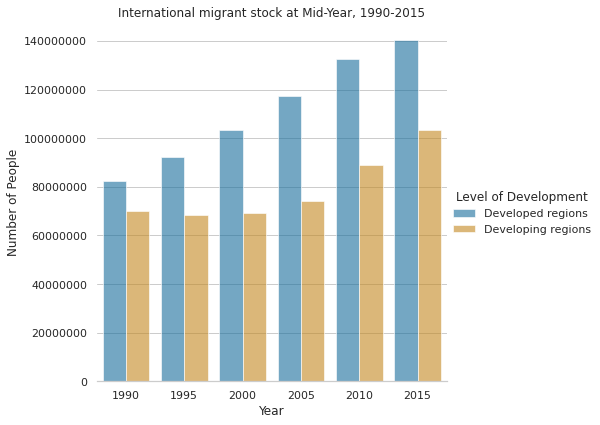

In [69]:
#International Migrant Stock (both sexes) comparison between Developed and Developing regions (Figure 1)
TABLE_A_Dev = TABLE_A[TABLE_A['Area'].isin(['Developed regions','Developing regions'])]
TABLE_A_Dev = TABLE_A_Dev[["Area","Year","Gender","variable","value"]]
TABLE_A_Dev = TABLE_A_Dev.loc[TABLE_A_Dev['variable'] == 'Int_Migrant_count']
TABLE_A_Dev = TABLE_A_Dev.loc[TABLE_A_Dev['Gender'] == 'Both_Sexes']

sns.set_theme(style="whitegrid")
ax = sns.catplot(
   data=TABLE_A_Dev, kind="bar",
   x="Year", y="value", hue="Area",
   ci="sd", palette="colorblind", alpha=.6, height=6
).set(title='International migrant stock at Mid-Year, 1990-2015')
ax.despine(left=True)
plt.ticklabel_format(style='plain', axis='y')
ax.set_axis_labels("Year", "Number of People")
ax.legend.set_title("Level of Development")



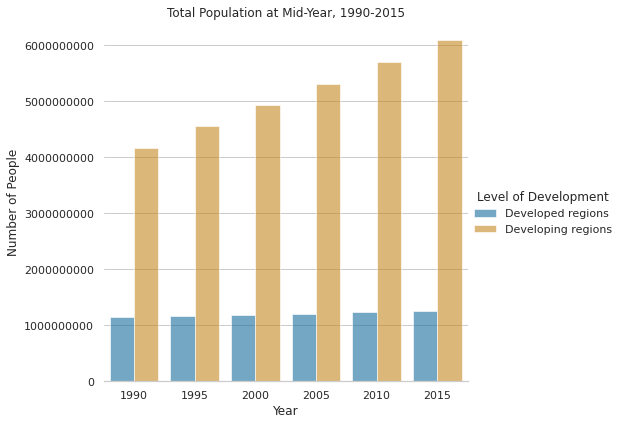

In [70]:
#Population (both sexes) comparison between Developed and Developing regions (Figure 2)
TABLE_A_Dev = TABLE_A[TABLE_A['Area'].isin(['Developed regions','Developing regions'])]
TABLE_A_Dev = TABLE_A_Dev[["Area","Year","Gender","variable","value"]]
TABLE_A_Dev = TABLE_A_Dev.loc[TABLE_A_Dev['variable'] == 'Tot_pop']
TABLE_A_Dev = TABLE_A_Dev.loc[TABLE_A_Dev['Gender'] == 'Both_Sexes']

sns.set_theme(style="whitegrid")
ax = sns.catplot(
   data=TABLE_A_Dev, kind="bar",
   x="Year", y="value", hue="Area",
   ci="sd", palette="colorblind", alpha=.6, height=6
).set(title='Total Population at Mid-Year, 1990-2015')
ax.despine(left=True)
plt.ticklabel_format(style='plain', axis='y')
ax.set_axis_labels("Year", "Number of People")
ax.legend.set_title("Level of Development")


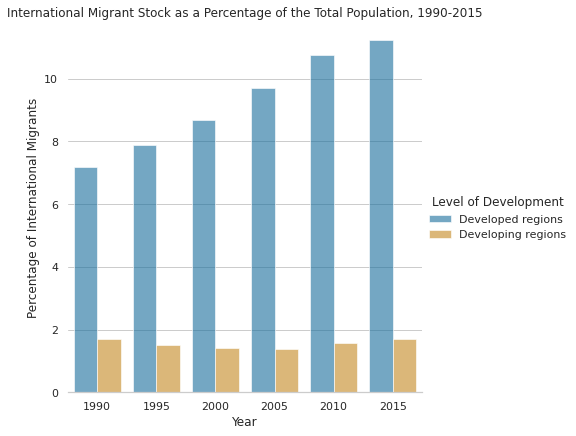

In [71]:
#International Migrant Stock as a % (both sexes) comparison between Developed and Developing regions (Figure 3)
TABLE_A_Dev = TABLE_A[TABLE_A['Area'].isin(['Developed regions','Developing regions'])]
TABLE_A_Dev = TABLE_A_Dev[["Area","Year","Gender","variable","value"]]
TABLE_A_Dev = TABLE_A_Dev.loc[TABLE_A_Dev['variable'] == 'Int_Migrant_percent']
TABLE_A_Dev = TABLE_A_Dev.loc[TABLE_A_Dev['Gender'] == 'Both_Sexes']

sns.set_theme(style="whitegrid")
ax = sns.catplot(
   data=TABLE_A_Dev, kind="bar",
   x="Year", y="value", hue="Area",
   ci="sd", palette="colorblind", alpha=.6, height=6
).set(title='International Migrant Stock as a Percentage of the Total Population, 1990-2015')
ax.despine(left=True)
plt.ticklabel_format(style='plain', axis='y')
ax.set_axis_labels("Year", "Percentage of International Migrants")
ax.legend.set_title("Level of Development")


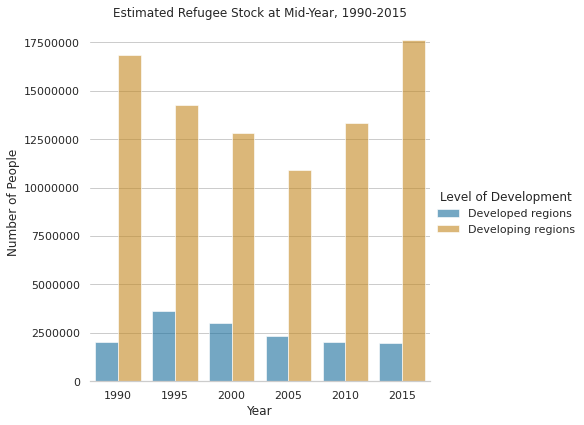

In [72]:
#Refugee stock (both sexes) comparison between Developed and Developing regions (Figure 4)
TABLE_A_Dev = TABLE_A[TABLE_A['Area'].isin(['Developed regions','Developing regions'])]
TABLE_A_Dev = TABLE_A_Dev[["Area","Year","Gender","variable","value"]]
TABLE_A_Dev = TABLE_A_Dev.loc[TABLE_A_Dev['variable'] == 'Refugee_Stock_Est']
TABLE_A_Dev = TABLE_A_Dev.loc[TABLE_A_Dev['Gender'] == 'Both_Sexes']

sns.set_theme(style="whitegrid")
ax = sns.catplot(
   data=TABLE_A_Dev, kind="bar",
   x="Year", y="value", hue="Area",
   ci="sd", palette="colorblind", alpha=.6, height=6
).set(title='Estimated Refugee Stock at Mid-Year, 1990-2015')
ax.despine(left=True)
plt.ticklabel_format(style='plain', axis='y')
ax.set_axis_labels("Year", "Number of People")
ax.legend.set_title("Level of Development")

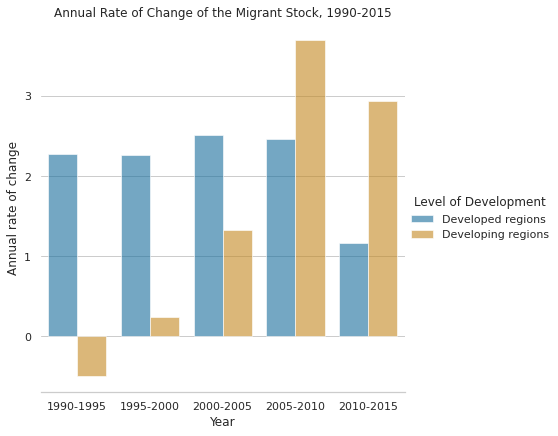

In [73]:
#Annual rate of change of the migrant stock (both sexes) comparison between Developed and Developing regions (Figure 5)
TABLE_B_Dev = TABLE_B[TABLE_B['Area'].isin(['Developed regions','Developing regions'])]
TABLE_B_Dev = TABLE_B_Dev[["Area","Year","Gender","variable","value"]]
TABLE_B_Dev = TABLE_B_Dev.loc[TABLE_B_Dev['variable'] == 'migrant_stock']
TABLE_B_Dev = TABLE_B_Dev.loc[TABLE_B_Dev['Gender'] == 'Both_Sexes']

sns.set_theme(style="whitegrid")
ax = sns.catplot(
   data=TABLE_B_Dev, kind="bar",
   x="Year", y="value", hue="Area",
   ci="sd", palette="colorblind", alpha=.6, height=6
).set(title='Annual Rate of Change of the Migrant Stock, 1990-2015')
ax.despine(left=True)
plt.ticklabel_format(style='plain', axis='y')
ax.set_axis_labels("Year", "Annual rate of change")
ax.legend.set_title("Level of Development")

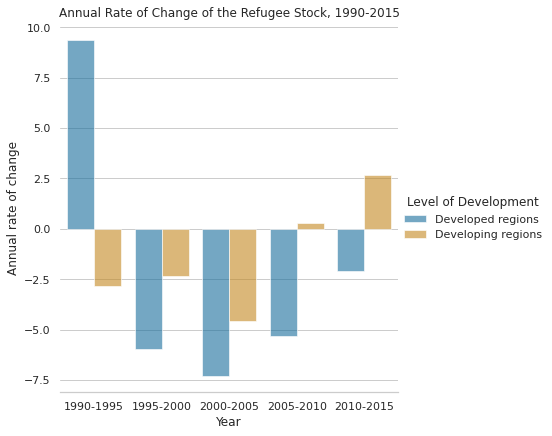

In [74]:
#Annual rate of change of the migrant stock (both sexes) comparison between Developed and Developing regions (Figure 5)
TABLE_B_Dev = TABLE_B[TABLE_B['Area'].isin(['Developed regions','Developing regions'])]
TABLE_B_Dev = TABLE_B_Dev[["Area","Year","Gender","variable","value"]]
TABLE_B_Dev = TABLE_B_Dev.loc[TABLE_B_Dev['variable'] == 'refugee_stock']
TABLE_B_Dev = TABLE_B_Dev.loc[TABLE_B_Dev['Gender'] == 'Both_Sexes']

sns.set_theme(style="whitegrid")
ax = sns.catplot(
   data=TABLE_B_Dev, kind="bar",
   x="Year", y="value", hue="Area",
   ci="sd", palette="colorblind", alpha=.6, height=6
).set(title='Annual Rate of Change of the Refugee Stock, 1990-2015')
ax.despine(left=True)
plt.ticklabel_format(style='plain', axis='y')
ax.set_axis_labels("Year", "Annual rate of change")
ax.legend.set_title("Level of Development")

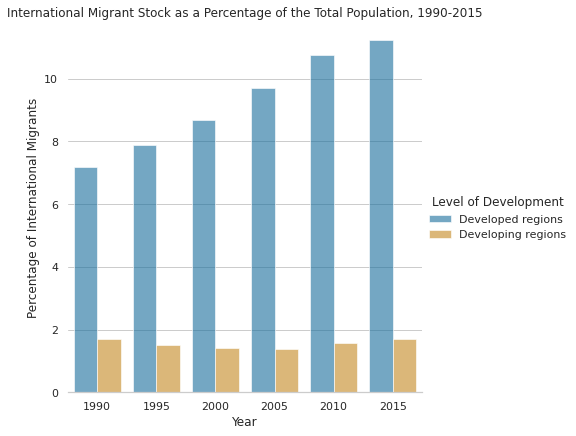

In [86]:
#Annual rate of change of the migrant stock (both sexes) comparison between Developed and Developing regions (Figure 6)
TABLE_A_Dev = TABLE_A[TABLE_A['Area'].isin(['Developed regions','Developing regions'])]
TABLE_A_Dev = TABLE_A_Dev[["Area","Year","Gender","variable","value"]]
TABLE_A_Dev = TABLE_A_Dev.loc[TABLE_A_Dev['variable'] == 'Int_Migrant_percent']
TABLE_A_Dev = TABLE_A_Dev.loc[TABLE_A_Dev['Gender'] == 'Both_Sexes']

sns.set_theme(style="whitegrid")
ax = sns.catplot(
   data=TABLE_A_Dev, kind="bar",
   x="Year", y="value", hue="Area",
   ci="sd", palette="colorblind", alpha=.6, height=6
).set(title='International Migrant Stock as a Percentage of the Total Population, 1990-2015')
ax.despine(left=True)
plt.ticklabel_format(style='plain', axis='y')
ax.set_axis_labels("Year", "Percentage of International Migrants")
ax.legend.set_title("Level of Development")

### For Regions

In [76]:
#DF for Table B region
TABLE_B_Region = Annex_df_major.merge(TABLE_B,how='inner',left_on=["Major code"], right_on="C_code")
TABLE_B_Region

Major code        Major area Major sort order Sort              Area  \
0          935              Asia               71   71              Asia   
1          935              Asia               71   71              Asia   
2          935              Asia               71   71              Asia   
3          935              Asia               71   71              Asia   
4          935              Asia               71   71              Asia   
..         ...               ...              ...  ...               ...   
175        905  Northern America              232  232  Northern America   
176        905  Northern America              232  232  Northern America   
177        905  Northern America              232  232  Northern America   
178        905  Northern America              232  232  Northern America   
179        905  Northern America              232  232  Northern America   

    Notes C_code Type       Year      Gender       variable     value  
0     NaN    935  NaN  1990-1995  Both_Sexes  migrant_stock -0.673431  
1     NaN    935  NaN  1995-2000  Both_Sexes  migrant_stock  1.165255  
2     NaN    935  NaN  2000-2005  Both_Sexes  migrant_stock  1.570402  
3     NaN    935  NaN  2005-2010  Both_Sexes  migrant_stock   4.22168  
4     NaN    935  NaN  2010-2015  Both_Sexes  migrant_stock   2.60427  
..    ...    ...  ...        ...         ...            ...       ...  
175   NaN    905  NaN  1990-1995      Female  refugee_stock       NaN  
176   NaN    905  NaN  1995-2000      Female  refugee_stock       NaN  
177   NaN    905  NaN  2000-2005      Female  refugee_stock       NaN  
178   NaN    905  NaN  2005-2010      Female  refugee_stock       NaN  
179   NaN    905  NaN  2010-2015      Female  refugee_stock       NaN  

[180 rows x 12 columns]

In [77]:
#DF for Table A region
TABLE_A_Region = Annex_df_major.merge(TABLE_A,how='inner',left_on=["Major code"], right_on="C_code")
TABLE_A_Region = TABLE_A_Region.loc[TABLE_A_Region['Gender'] == 'Both_Sexes']
TABLE_A_Region

Major code        Major area Major sort order Sort              Area  \
0          935              Asia               71   71              Asia   
1          935              Asia               71   71              Asia   
2          935              Asia               71   71              Asia   
3          935              Asia               71   71              Asia   
4          935              Asia               71   71              Asia   
..         ...               ...              ...  ...               ...   
631        905  Northern America              232  232  Northern America   
632        905  Northern America              232  232  Northern America   
633        905  Northern America              232  232  Northern America   
634        905  Northern America              232  232  Northern America   
635        905  Northern America              232  232  Northern America   

    Notes C_code Type  Year      Gender           variable       value  
0     NaN    935  NaN  1990  Both_Sexes  Int_Migrant_count  48142261.0  
1     NaN    935  NaN  1995  Both_Sexes  Int_Migrant_count  46548225.0  
2     NaN    935  NaN  2000  Both_Sexes  Int_Migrant_count  49340815.0  
3     NaN    935  NaN  2005  Both_Sexes  Int_Migrant_count  53371224.0  
4     NaN    935  NaN  2010  Both_Sexes  Int_Migrant_count  65914319.0  
..    ...    ...  ...   ...         ...                ...         ...  
631   NaN    905  NaN  1995  Both_Sexes    Refugee_percent    2.325712  
632   NaN    905  NaN  2000  Both_Sexes    Refugee_percent    1.569633  
633   NaN    905  NaN  2005  Both_Sexes    Refugee_percent    1.160652  
634   NaN    905  NaN  2010  Both_Sexes    Refugee_percent     0.83974  
635   NaN    905  NaN  2015  Both_Sexes    Refugee_percent    0.778034  

[216 rows x 12 columns]

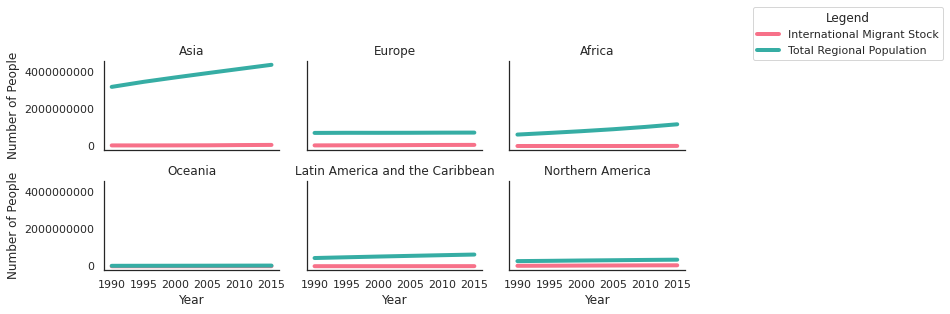

In [79]:
#Figure 9
TABLE_A_Region2 = TABLE_A_Region[["Major area","Year","Gender","variable","value"]]
TABLE_A_Region2 = TABLE_A_Region2[TABLE_A_Region2['variable'].isin(['Int_Migrant_count', 'Tot_pop'])]

sns.set_theme(style="white")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=TABLE_A_Region2,
    x="Year", y="value", col="Major area", hue="variable",
    kind="line", palette="husl", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend = False
)


g.set_axis_labels("Year", "Number of People")
g.set_titles(col_template='{col_name}')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Legend',labels=['International Migrant Stock', 'Total Regional Population'],bbox_to_anchor = (2.5,3))

Text(0, 0.5, 'International Migrant Stock (%)')

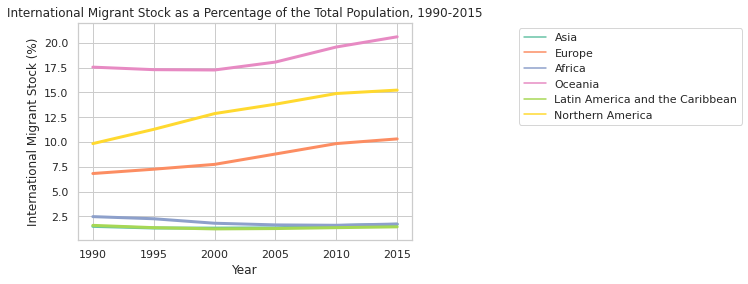

In [80]:
#Figure 8

TABLE_A_Region_5 = TABLE_A_Region[["Major area","Year","Gender","variable","value"]]
TABLE_A_Region_5 = TABLE_A_Region_5[TABLE_A_Region_5['variable'].isin(['Int_Migrant_percent'])]

sns.set_theme(style="whitegrid")

ax = sns.lineplot( x= "Year", y = "value", hue = "Major area", data=TABLE_A_Region_5,palette="Set2", linewidth=3)
ax.legend(bbox_to_anchor = (2,1))
ax.ticklabel_format(style='plain', axis='y')
plt.ylim(0.1, 22)
ax.set_title('International Migrant Stock as a Percentage of the Total Population, 1990-2015')
ax.set_xlabel('Year')
ax.set_ylabel('International Migrant Stock (%)')

Text(0, 0.5, 'International Migrant Stock (%)')

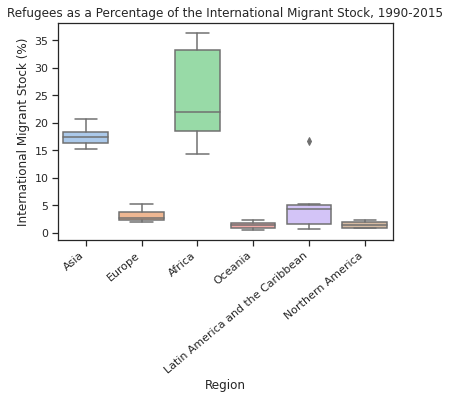

In [81]:
#Figure 7
TABLE_A_Region_3 = TABLE_A_Region[["Major area","Year","Gender","variable","value"]]
TABLE_A_Region_3 = TABLE_A_Region[TABLE_A_Region['variable'].isin(['Refugee_percent'])]
sns.set_theme(style="whitegrid")

sns.set_theme(style="ticks", palette="pastel")

ax = sns.boxplot(x="Major area", y="value",
            data=TABLE_A_Region_3 )
plt.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Refugees as a Percentage of the International Migrant Stock, 1990-2015')
ax.set_xlabel('Region')
ax.set_ylabel('International Migrant Stock (%)')


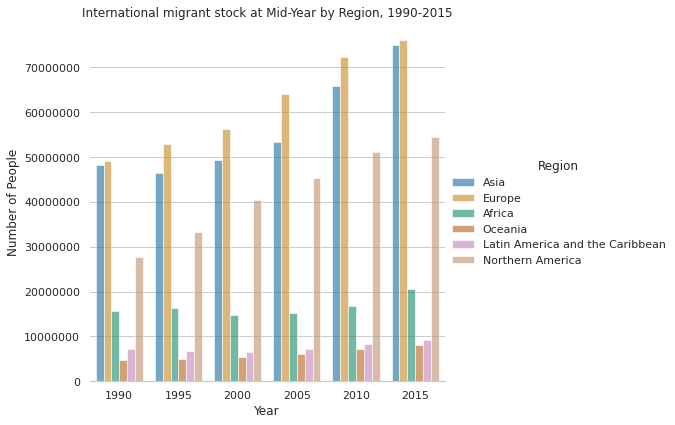

In [82]:
#Did not use in report, but provided useful information 
TABLE_A_Region4 = TABLE_A_Region2[TABLE_A_Region2['variable'].isin(['Int_Migrant_count'])]

sns.set_theme(style="whitegrid")
ax = sns.catplot(
   data=TABLE_A_Region4, kind="bar",
   x="Year", y="value", hue="Major area",
   ci="sd", palette="colorblind", alpha=.6, height=6
).set(title='International migrant stock at Mid-Year by Region, 1990-2015')
ax.despine(left=True)
plt.ticklabel_format(style='plain', axis='y')
ax.set_axis_labels("Year", "Number of People")
ax.legend.set_title("Region")
